
BASIC STATISTICS:

Mean:
 Roll-1                                                  169.33
Math-1 Theory                                            60.45
Physics Theory                                           62.20
Physics Practical                                        72.35
Java-1 Theory                                            49.22
Java-1 Practical                                         75.48
Software Engineering Theory                              63.98
Software Engineering Practical                           72.23
Environmental Science Theory                             71.37
IOT Workshop Practical                                   75.99
Computer Workshop Practical                              78.49
Math-2 Theory                                            53.30
Data Structures using Java Theory                        60.05
Data Structures using Java Practical                     71.11
DBMS Theory                                              60.92
DBMS Practical              

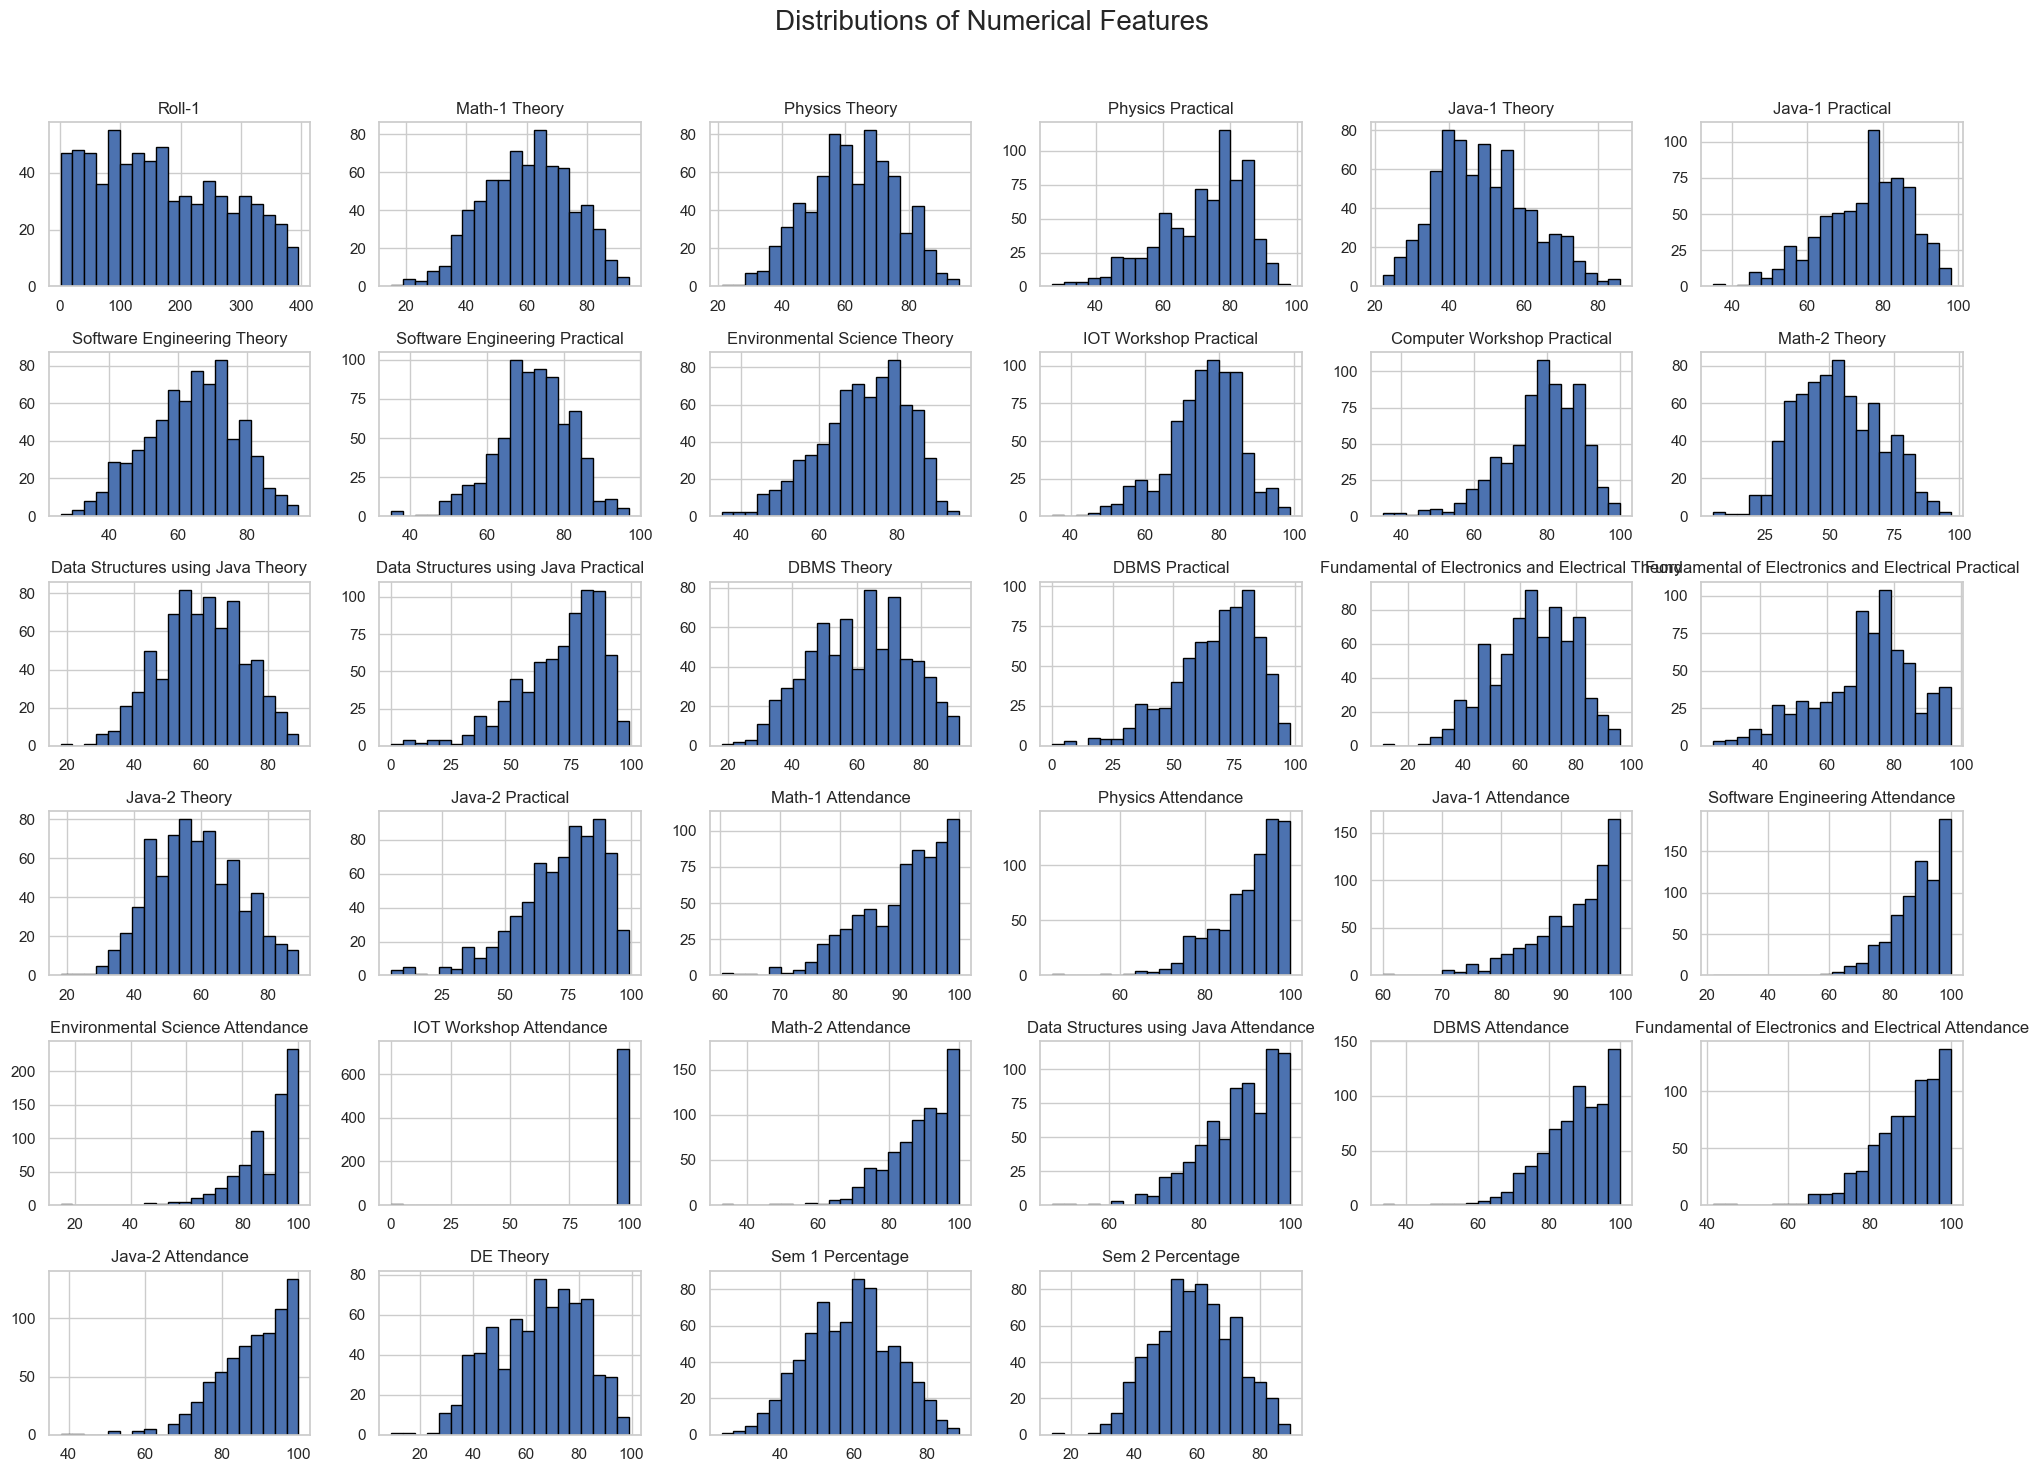

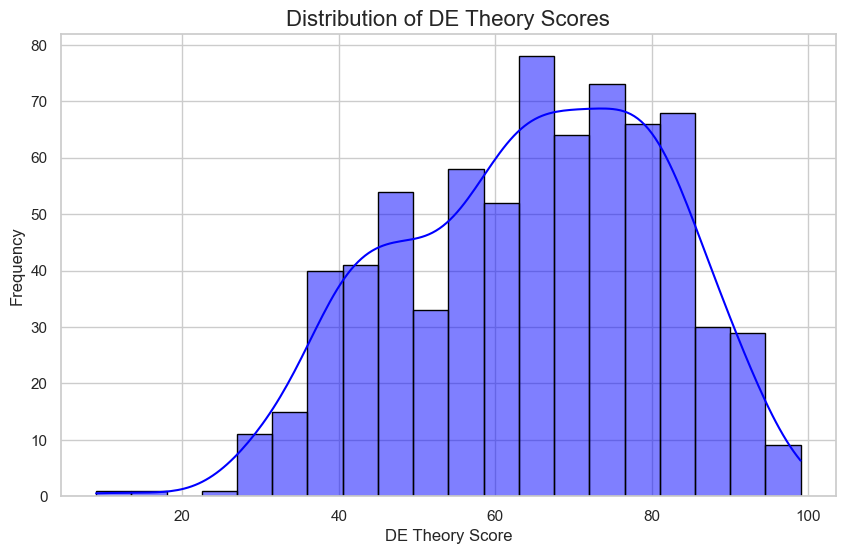

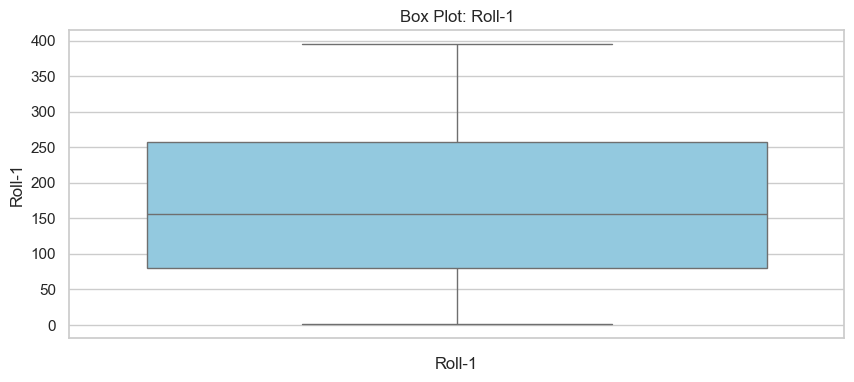

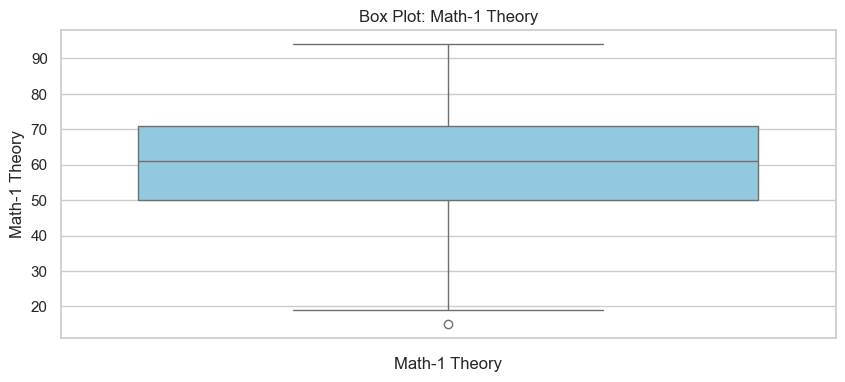

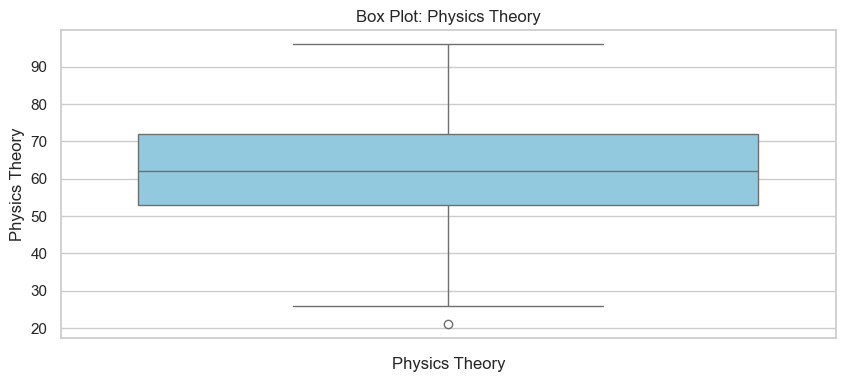

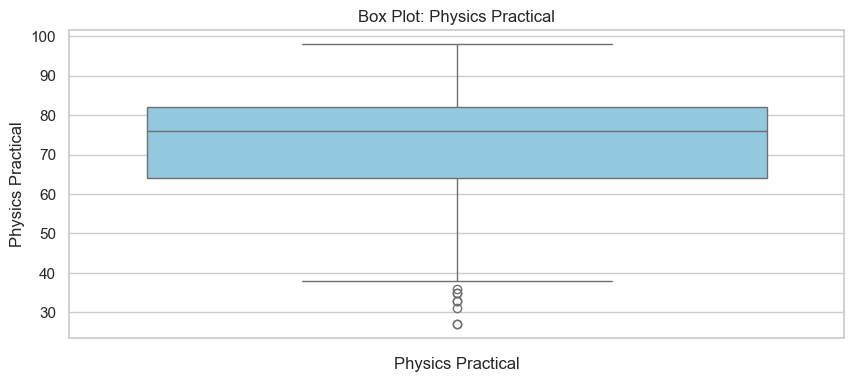

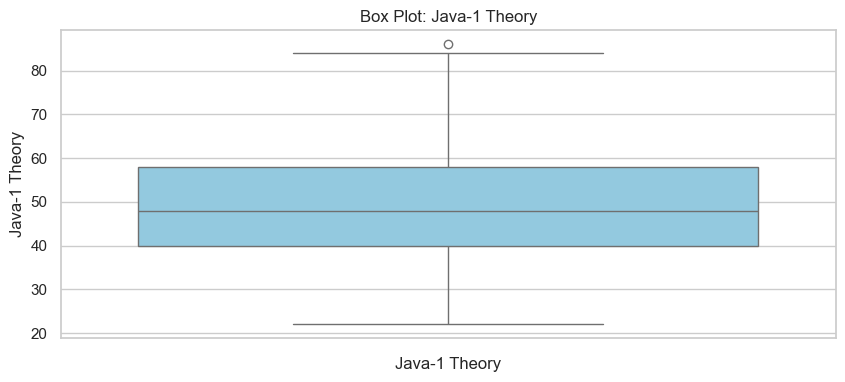

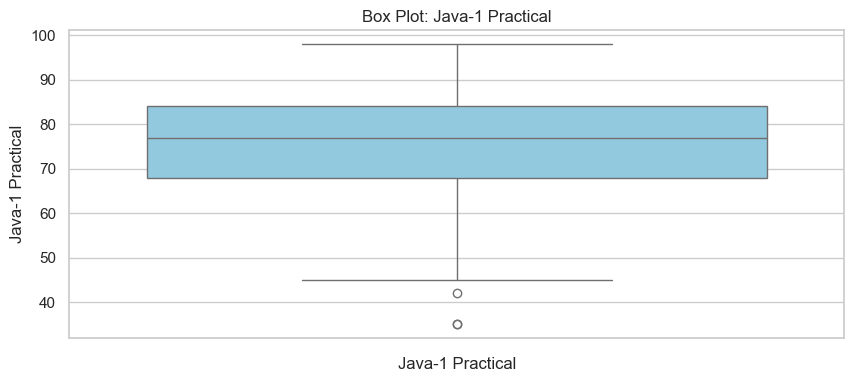

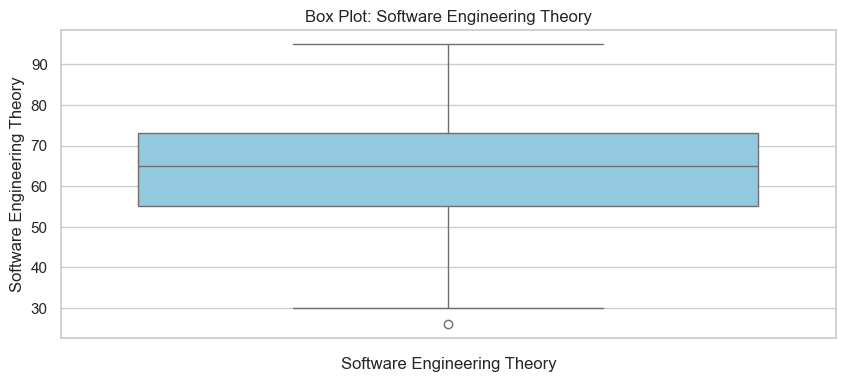

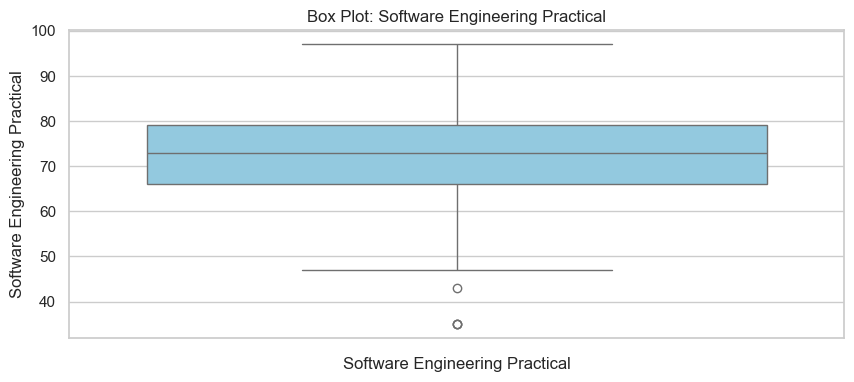

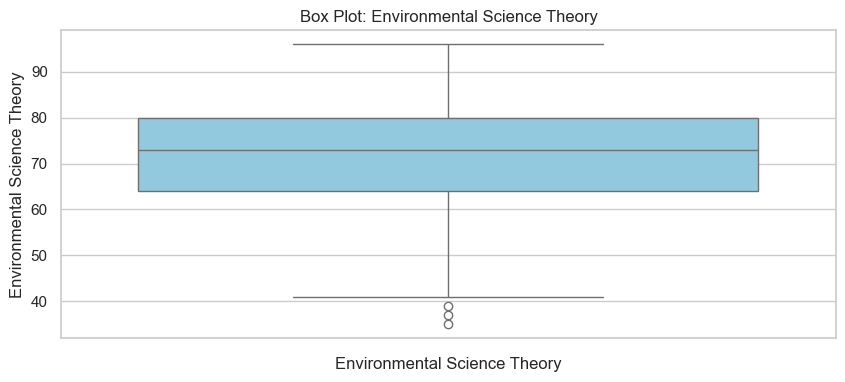

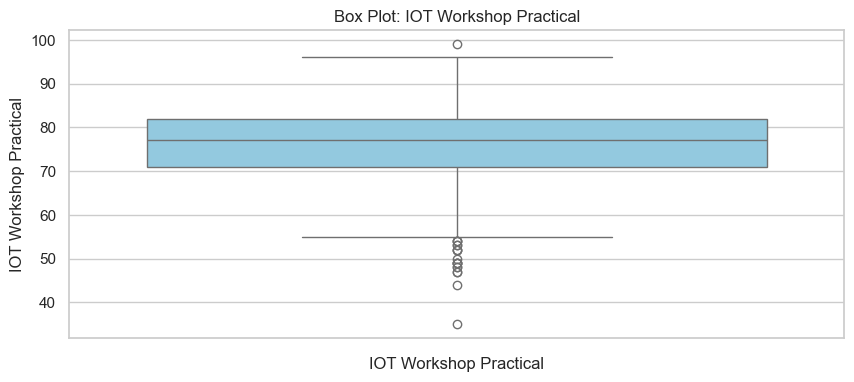

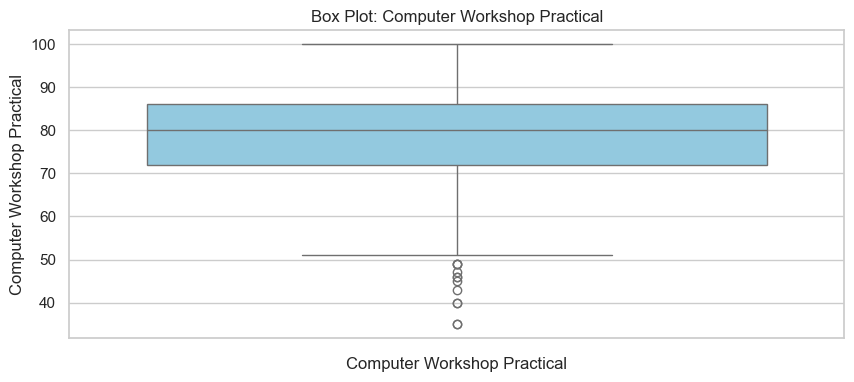

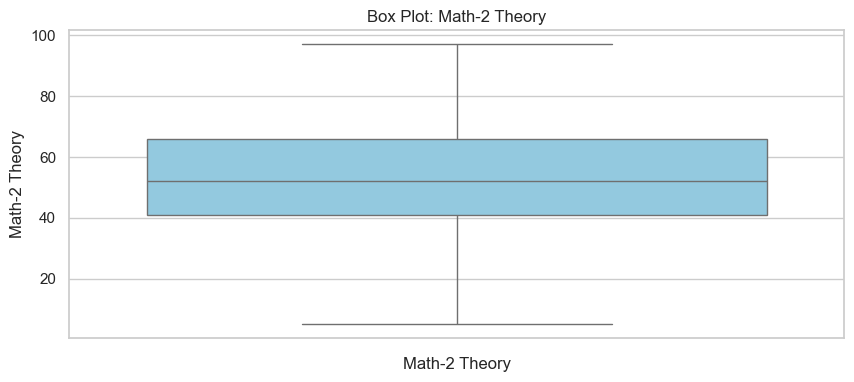

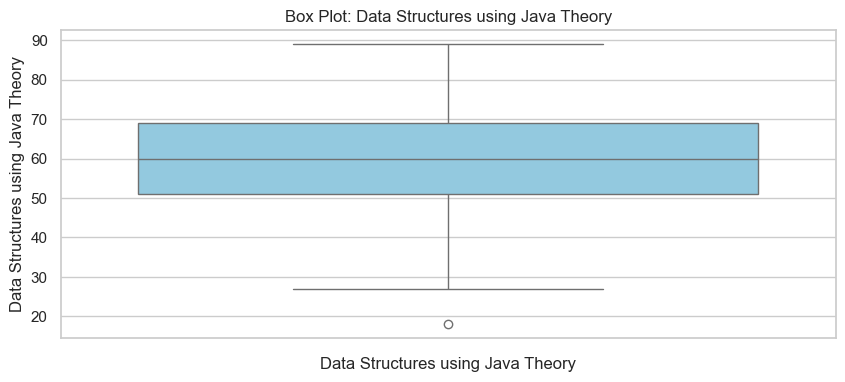

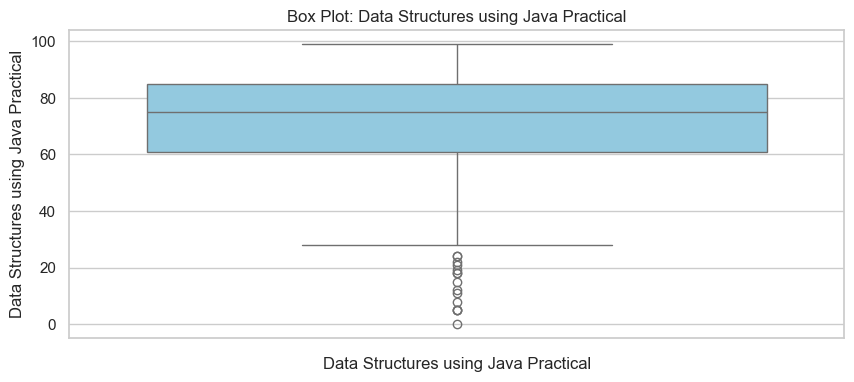

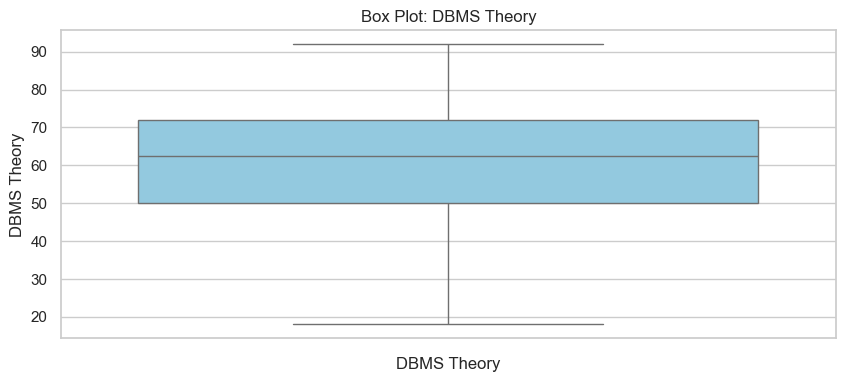

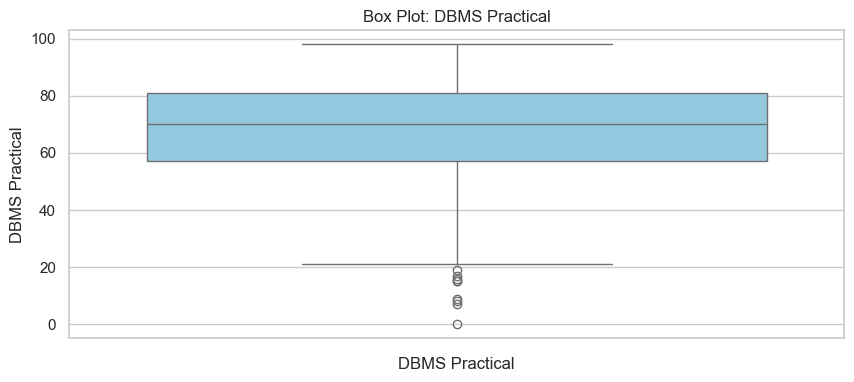

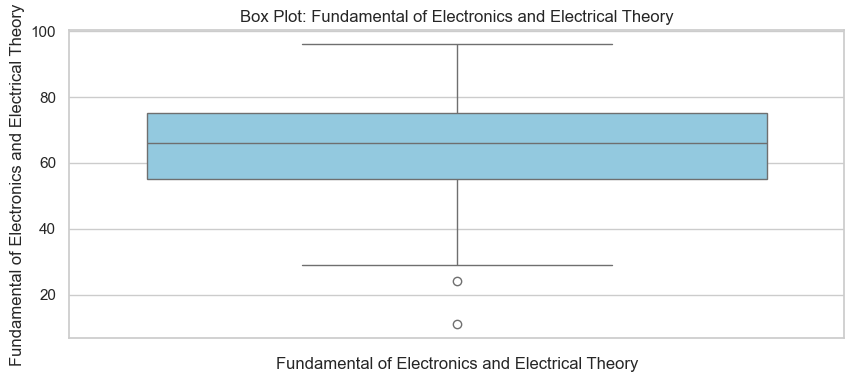

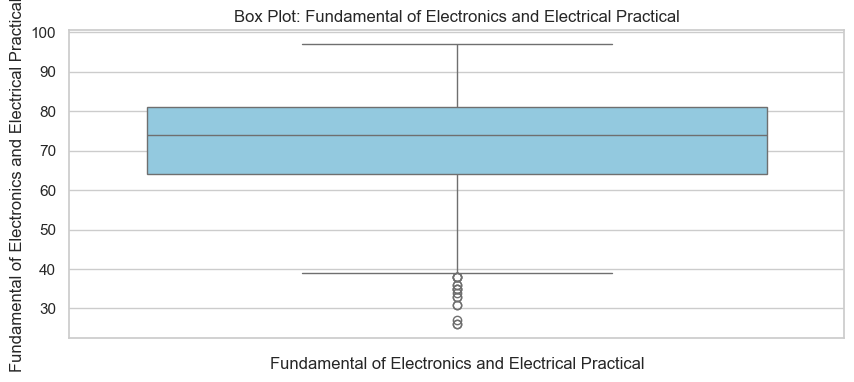

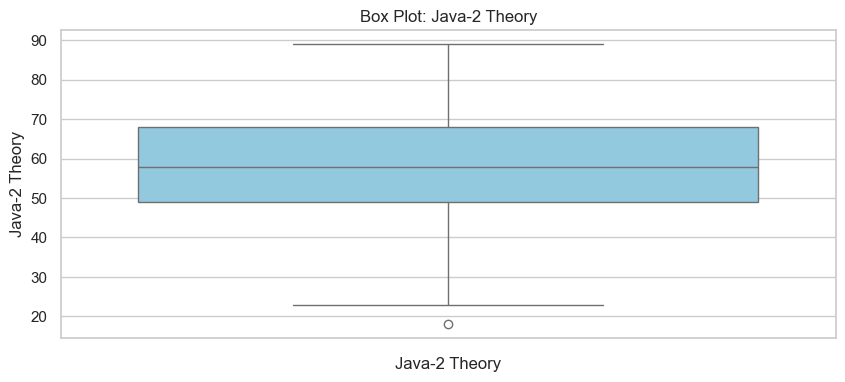

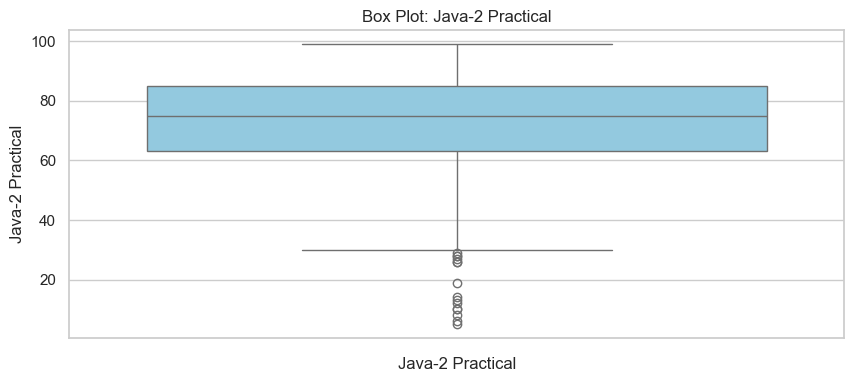

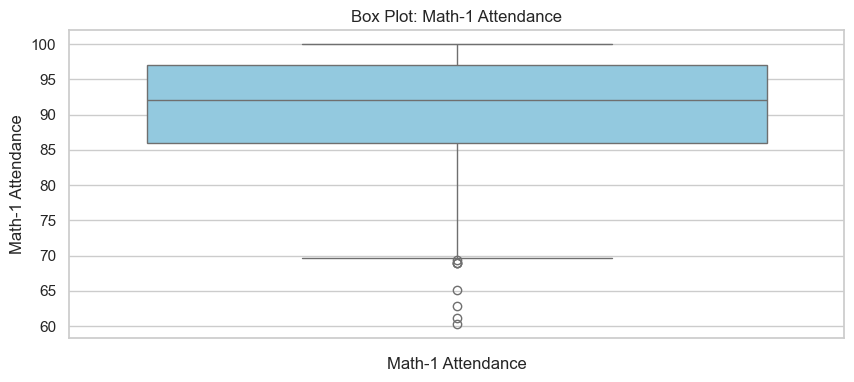

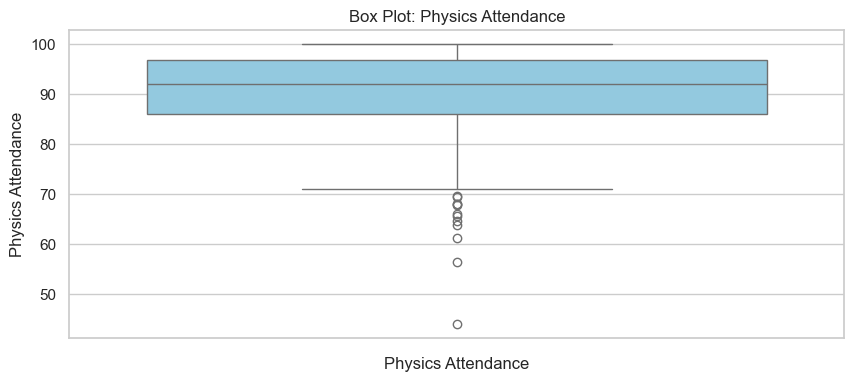

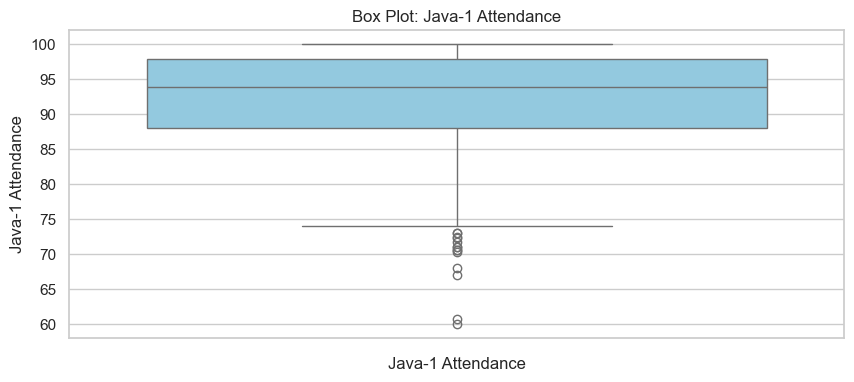

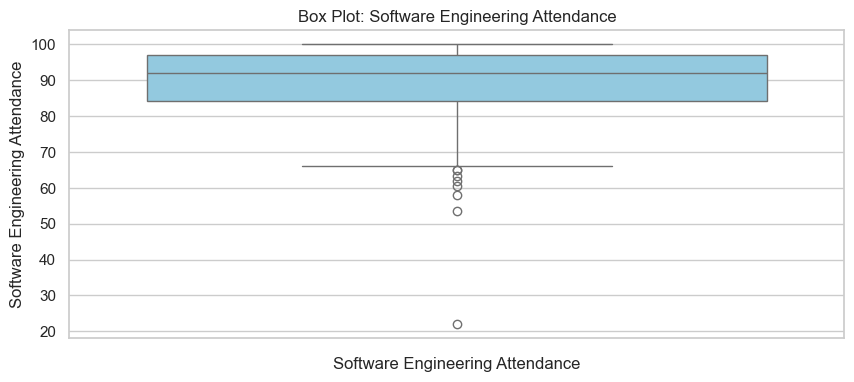

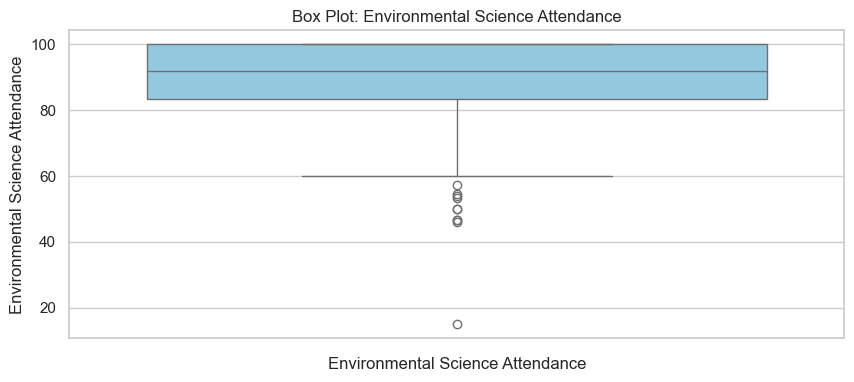

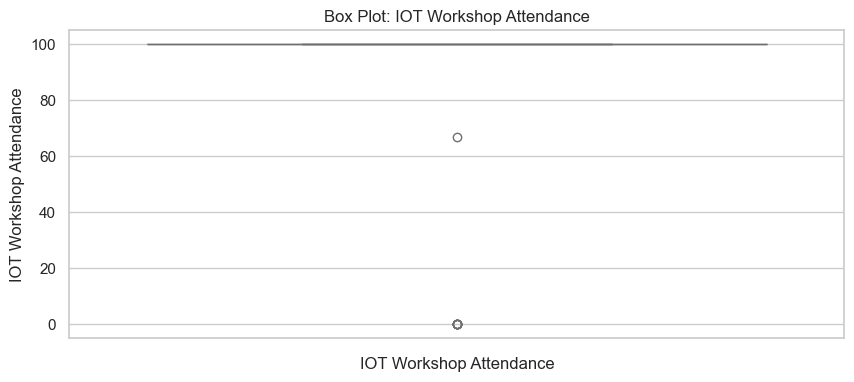

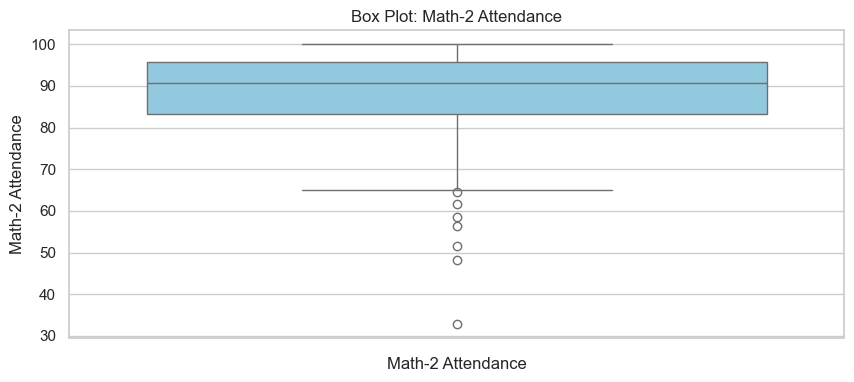

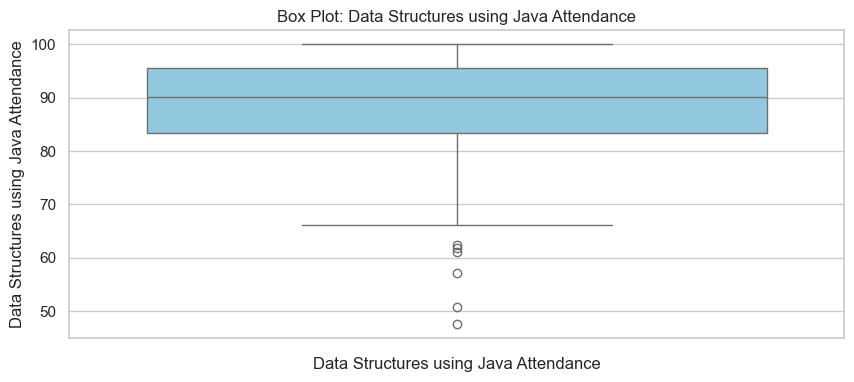

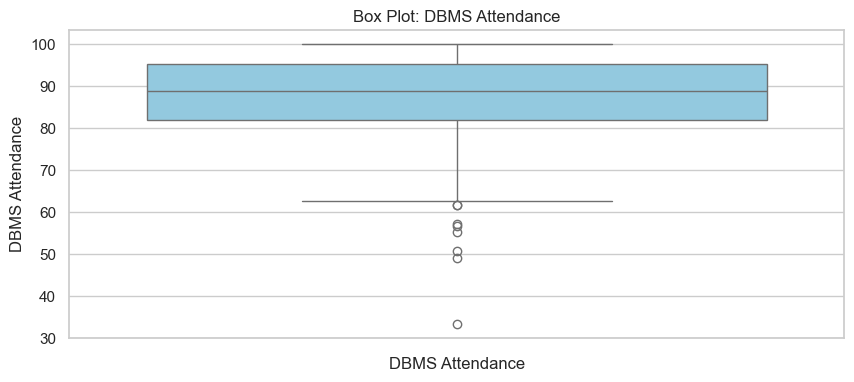

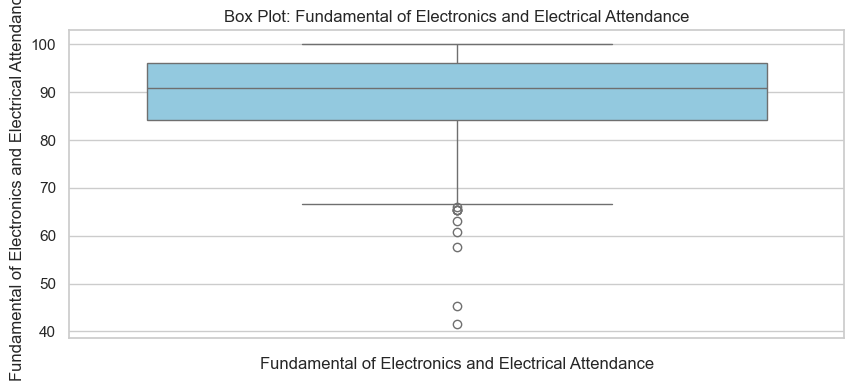

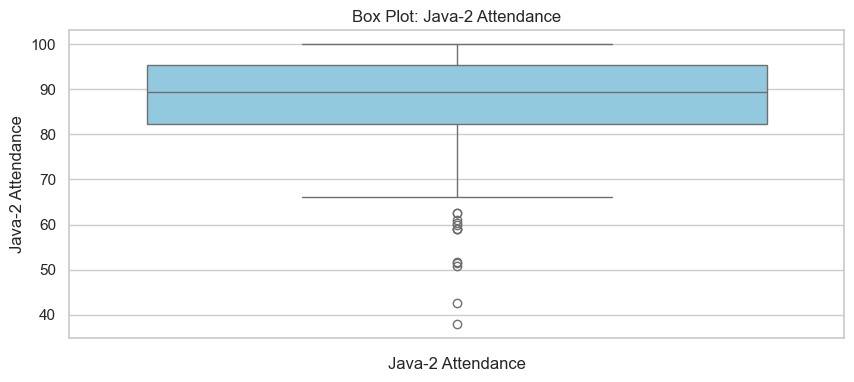

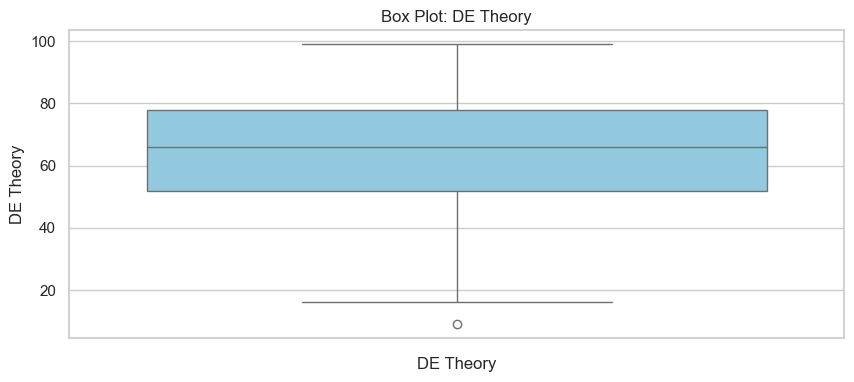

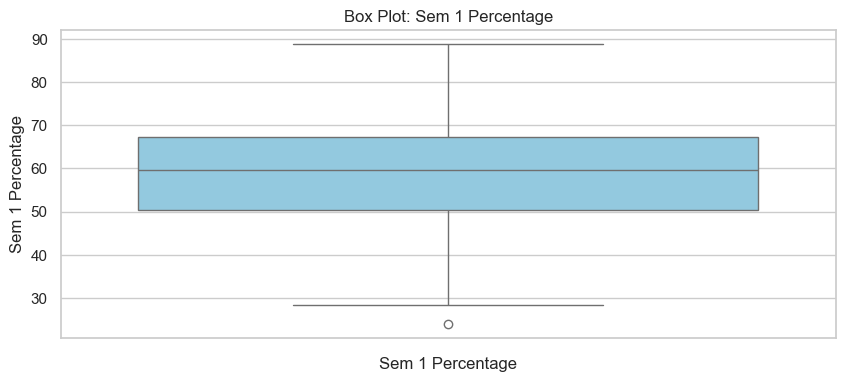

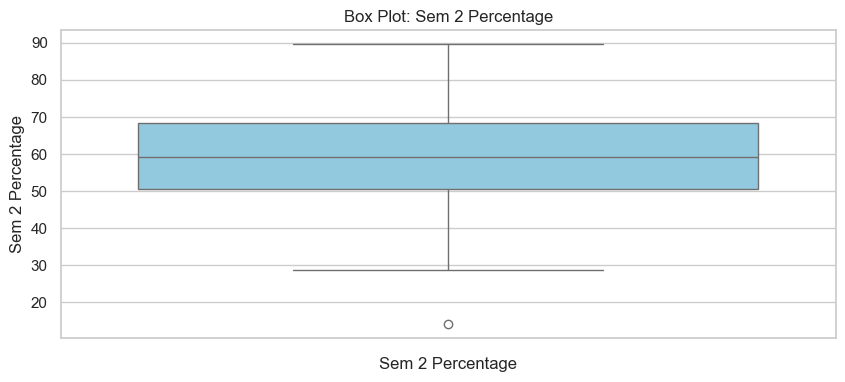

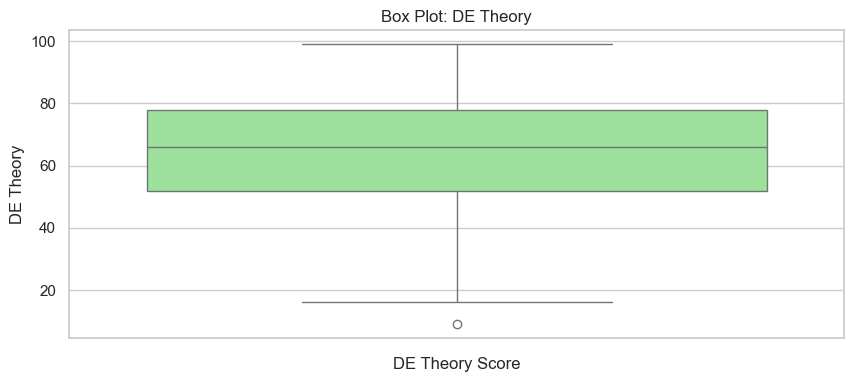

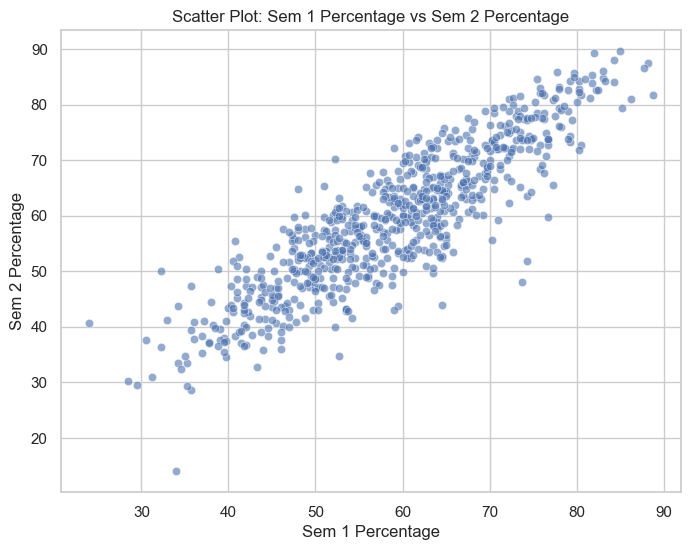

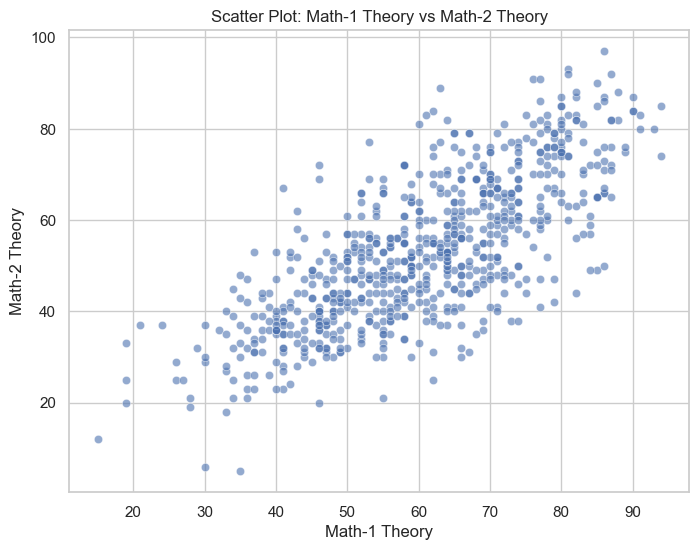

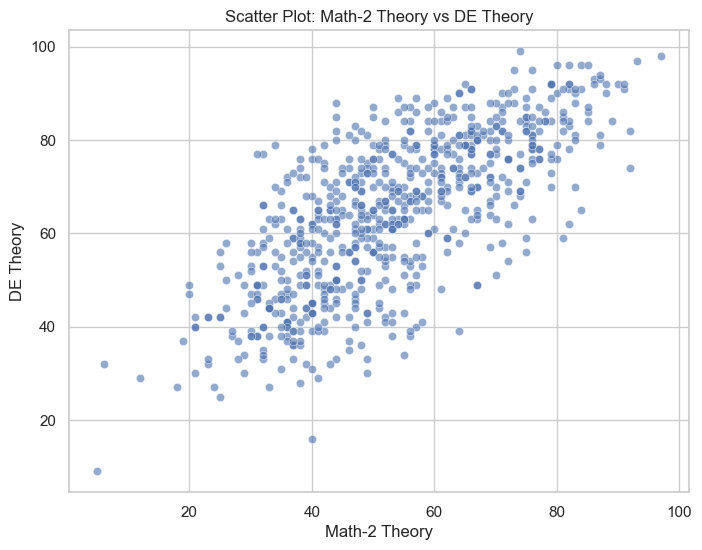

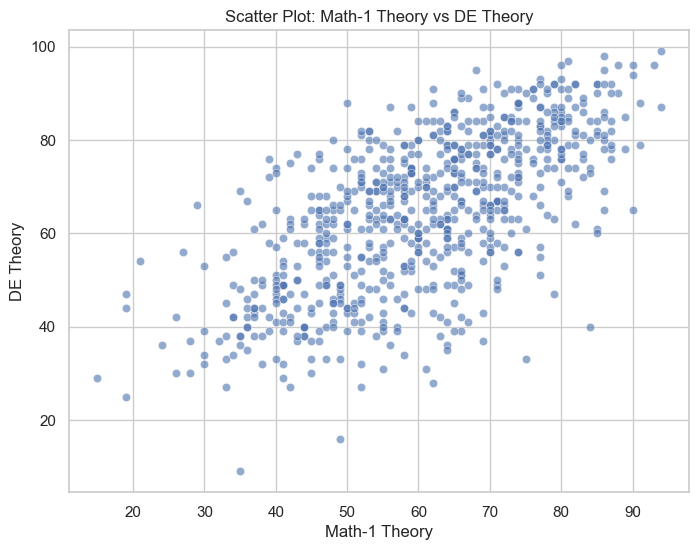

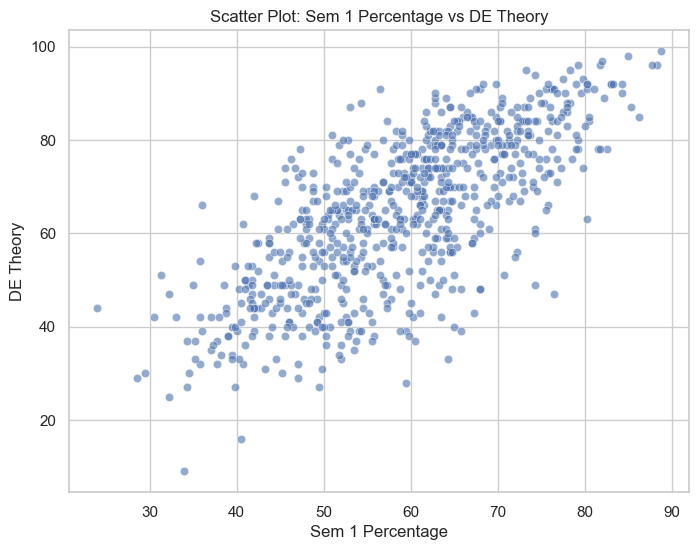

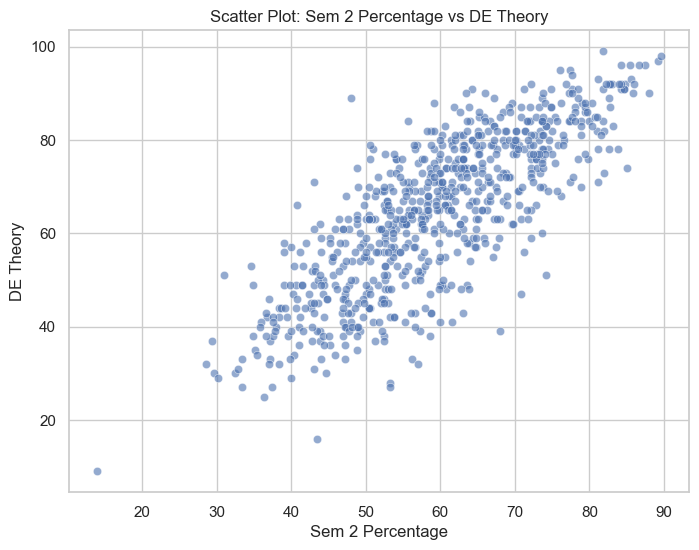


Correlation Matrix (DE Theory Focus):
                   DE Theory  Math-1 Theory  Math-2 Theory  Sem 1 Percentage  \
DE Theory              1.00           0.66           0.72              0.73   
Math-1 Theory          0.66           1.00           0.74              0.87   
Math-2 Theory          0.72           0.74           1.00              0.77   
Sem 1 Percentage       0.73           0.87           0.77              1.00   
Sem 2 Percentage       0.80           0.76           0.88              0.88   

                  Sem 2 Percentage  
DE Theory                     0.80  
Math-1 Theory                 0.76  
Math-2 Theory                 0.88  
Sem 1 Percentage              0.88  
Sem 2 Percentage              1.00  


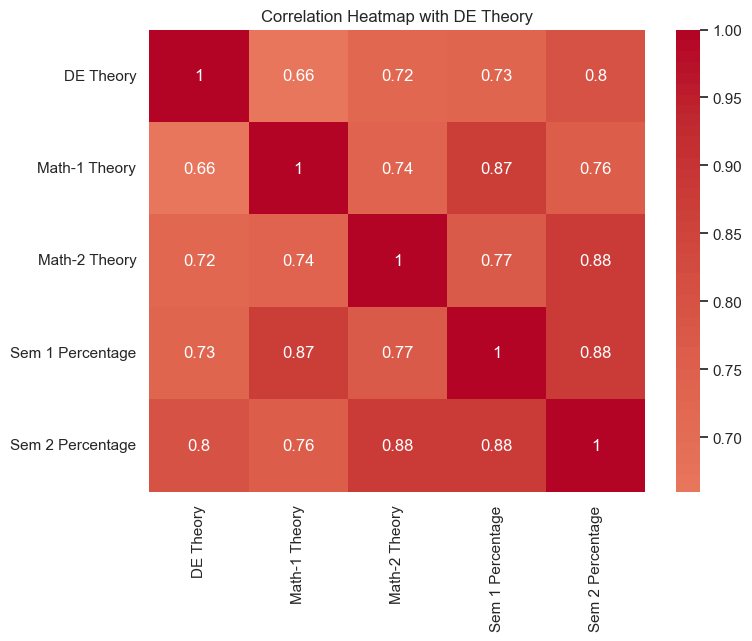

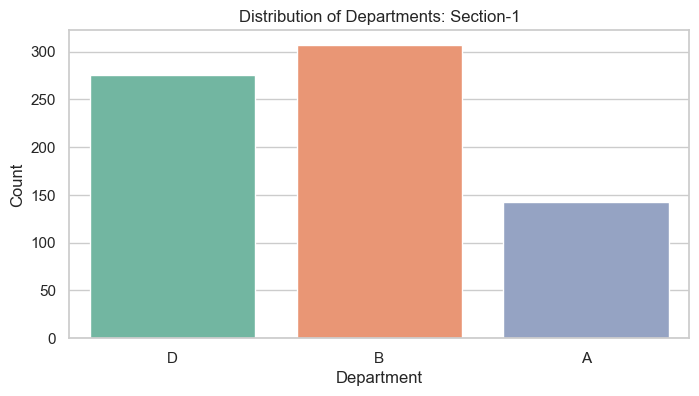

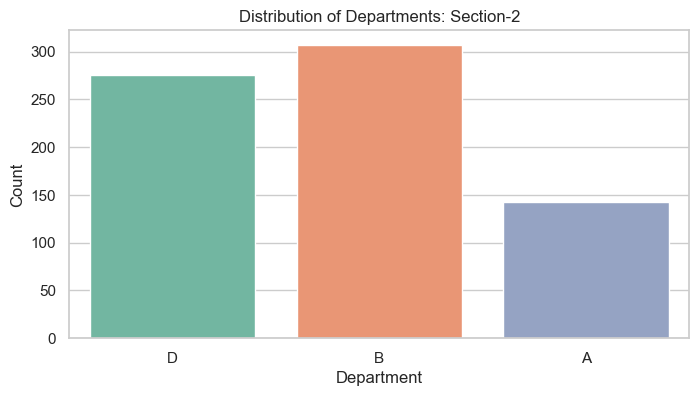

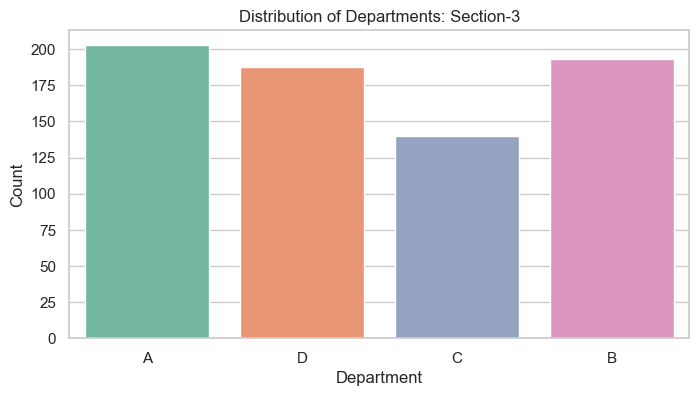

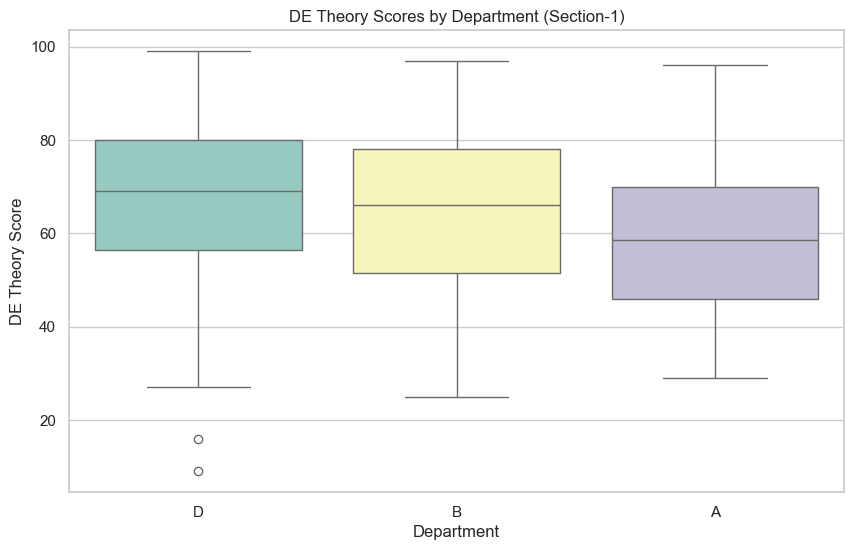

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Read the DE train data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "Math-3 Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

# Calculate Semester 1 Percentage as the average of core subject scores
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Set visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# BASIC STATISTICS
print("\nBASIC STATISTICS:\n")
print("Mean:\n", df.mean(numeric_only=True).round(2))
print("\nMedian:\n", df.median(numeric_only=True).round(2))
print("\nMode:\n", df.mode(numeric_only=True).iloc[0].round(2))
print("\nMinimum:\n", df.min(numeric_only=True))
print("\nMaximum:\n", df.max(numeric_only=True))

# DE THEORY FOCUSED EDA
print("\nDE THEORY SPECIFIC STATISTICS:\n")
print("Mean DE Theory:", df["DE Theory"].mean().round(2))
print("Median DE Theory:", df["DE Theory"].median().round(2))
print("Mode DE Theory:", df["DE Theory"].mode()[0].round(2))
print("Min DE Theory:", df["DE Theory"].min())
print("Max DE Theory:", df["DE Theory"].max())
print("Std Dev DE Theory:", df["DE Theory"].std().round(2))
print("Skewness DE Theory:", df["DE Theory"].skew().round(2))
print("Kurtosis DE Theory:", df["DE Theory"].kurt().round(2))

# HISTOGRAMS (Including DE Theory)
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols].hist(bins=20, figsize=(20, 15), edgecolor="black")
plt.suptitle("Distributions of Numerical Features", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# DE THEORY HISTOGRAM (Focused)
plt.figure(figsize=(10, 6))
sns.histplot(df["DE Theory"], bins=20, kde=True, color="blue", edgecolor="black")
plt.title("Distribution of DE Theory Scores", fontsize=16)
plt.xlabel("DE Theory Score")
plt.ylabel("Frequency")
plt.show()

# BOX PLOTS (Outlier Detection)
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df[col], color="skyblue")
    plt.title(f"Box Plot: {col}")
    plt.xlabel(col)
    plt.show()

# DE THEORY BOX PLOT (Focused)
plt.figure(figsize=(10, 4))
sns.boxplot(data=df["DE Theory"], color="lightgreen")
plt.title("Box Plot: DE Theory")
plt.xlabel("DE Theory Score")
plt.show()

# SCATTER PLOTS (Including DE Theory relationships)
scatter_pairs = [
    ("Sem 1 Percentage", "Sem 2 Percentage"),
    ("Math-1 Theory", "Math-2 Theory"),
    ("Math-2 Theory", "DE Theory"),
    ("Math-1 Theory", "DE Theory"),
    ("Sem 1 Percentage", "DE Theory"),
    ("Sem 2 Percentage", "DE Theory"),
]

for x, y in scatter_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[x], y=df[y], alpha=0.6)
    plt.title(f"Scatter Plot: {x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# CORRELATION ANALYSIS WITH DE THEORY
correlation_cols = [
    "DE Theory",
    "Math-1 Theory",
    "Math-2 Theory",
    "Sem 1 Percentage",
    "Sem 2 Percentage",
]
correlation_matrix = df[correlation_cols].corr().round(2)
print("\nCorrelation Matrix (DE Theory Focus):\n", correlation_matrix)

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap with DE Theory")
plt.show()

# DEPARTMENT DISTRIBUTIONS
section_cols = ["Section-1", "Section-2", "Section-3"]
for col in section_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], palette="Set2")
    plt.title(f"Distribution of Departments: {col}")
    plt.xlabel("Department")
    plt.ylabel("Count")
    plt.show()

# DE THEORY BY DEPARTMENT (Section-1)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Section-1"], y=df["DE Theory"], palette="Set3")
plt.title("DE Theory Scores by Department (Section-1)")
plt.xlabel("Department")
plt.ylabel("DE Theory Score")
plt.show()

Head of train_dataset.csv:
  Gender Religion Branch Section-1 Section-2 Section-3  Roll-1  Math-1 Theory  \
0      M    Hindu     CE         D         D         A     350             47   
1      F    Hindu    CST         B         B         D      18             84   
2      F    Hindu   AIML         A         A         C      23             74   
3      M    Hindu    CST         B         B         D     212             55   
4      M    Hindu    CST         B         B         D     208             38   

   Physics Theory  Physics Practical  ...  Environmental Science Attendance  \
0              48                 75  ...                            100.00   
1              83                 81  ...                            100.00   
2              85                 86  ...                             92.31   
3              69                 82  ...                            100.00   
4              59                 74  ...                            100.00   

   IOT Work

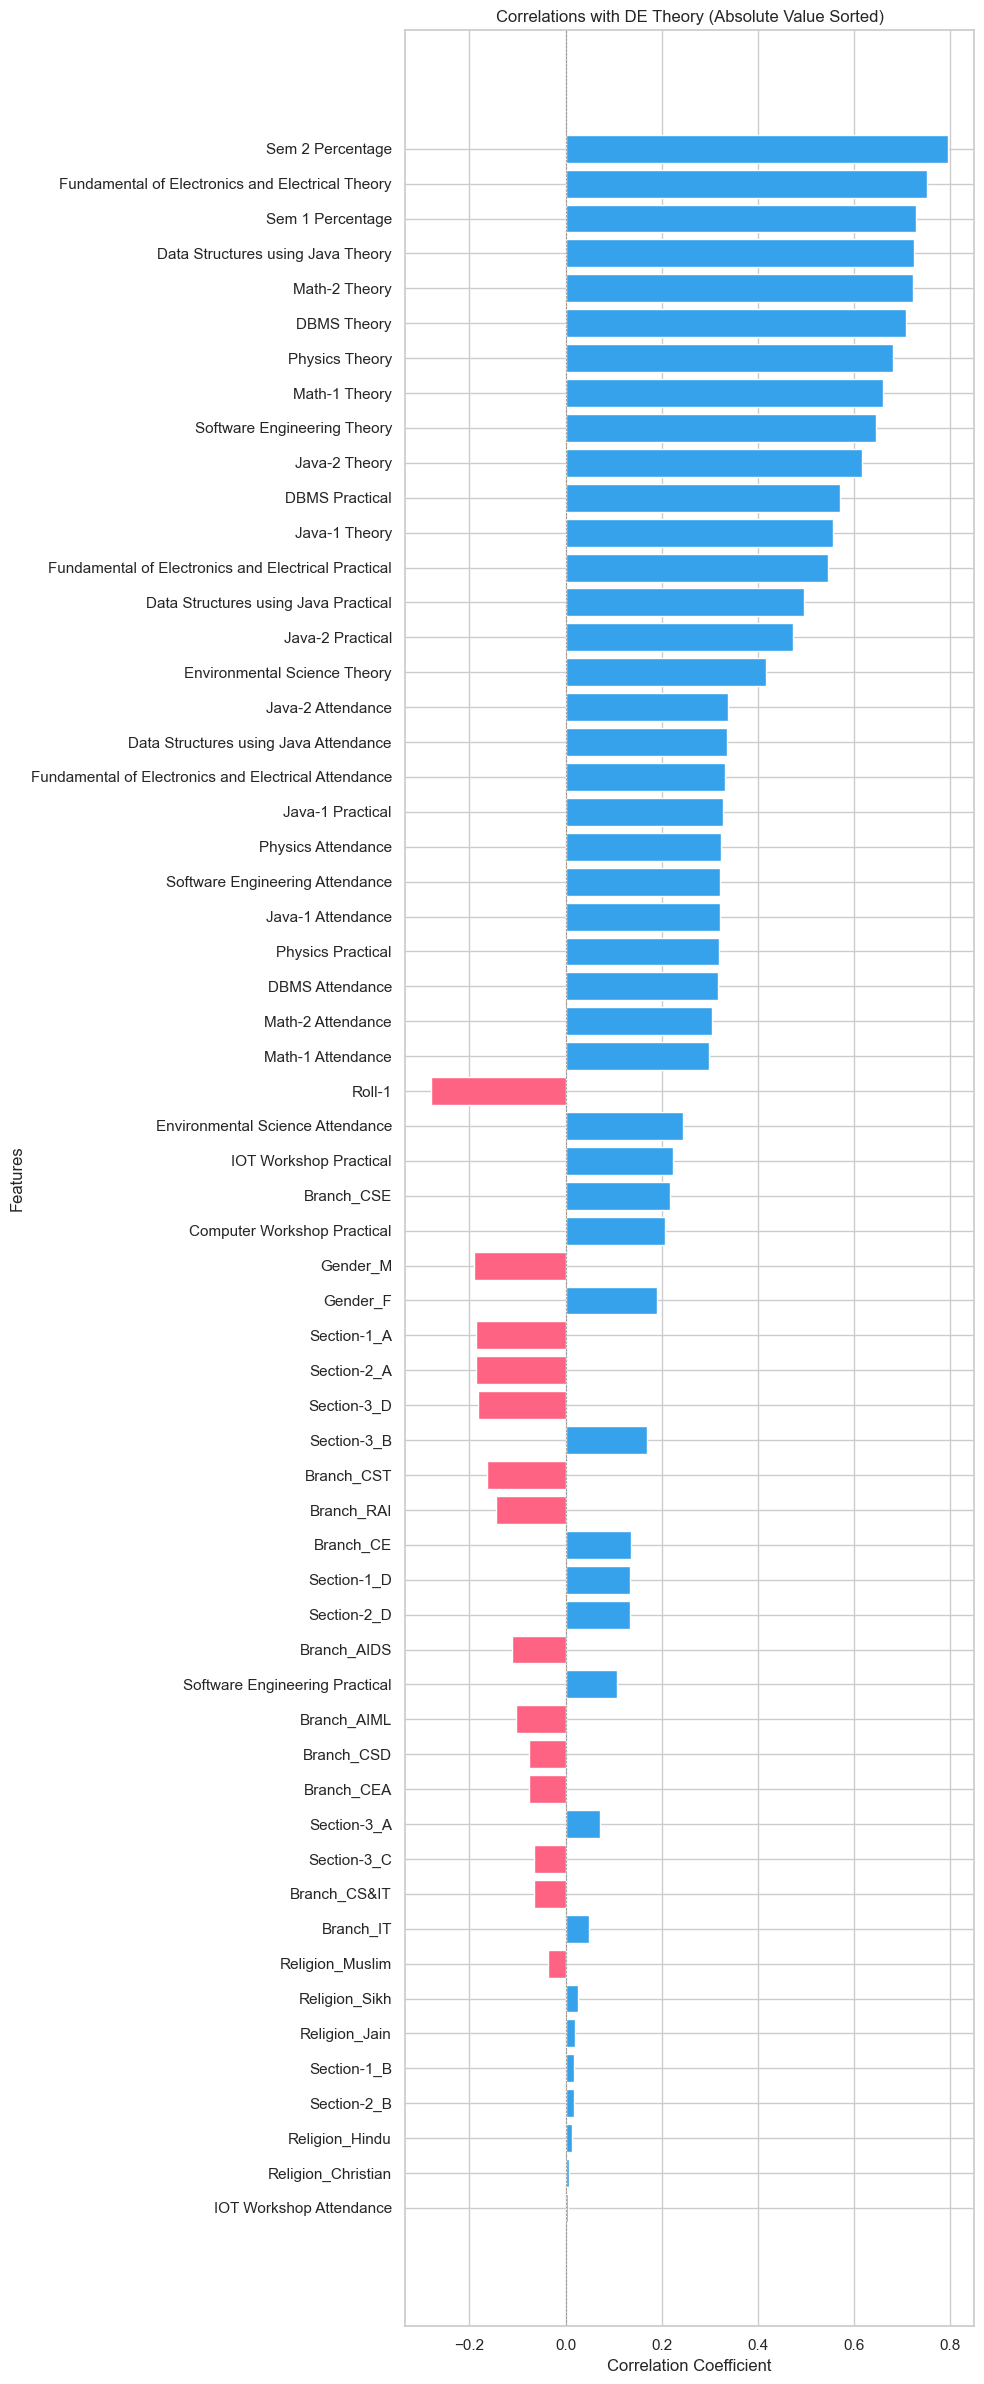

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the DE train data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "Math-3 Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# Print the first 5 rows
print("Head of train_dataset.csv:")
print(df.head())

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

# Initialize a dictionary to store correlations
correlations = {}

# Compute Pearson correlation for numeric columns with DE Theory
for col in numeric_cols:
    if col != "DE Theory":  # Exclude the target itself, mentor columns
        corr = df[col].corr(df["DE Theory"])
        correlations[col] = corr

# Encode categorical columns for correlation
for col in categorical_cols:
    if col in ["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"]:
        # One-hot encode categorical columns
        encoded = pd.get_dummies(df[col], prefix=col)
        for encoded_col in encoded.columns:
            corr = encoded[encoded_col].corr(df["DE Theory"])
            correlations[encoded_col] = corr

# Convert Roll-1 to numeric and compute correlation
if "Roll-1" in df.columns:
    corr = df["Roll-1"].astype(float).corr(df["DE Theory"])
    correlations["Roll-1"] = corr

# Sort correlations by absolute value in descending order
sorted_correlations = dict(
    sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
)

# Print sorted correlations
print("\nCorrelations with DE Theory (sorted by absolute value):")
for col, corr in sorted_correlations.items():
    print(f"{col}: {corr:.4f}")

# Prepare data for plotting
labels = list(sorted_correlations.keys())
values = list(sorted_correlations.values())

# Create a horizontal bar plot
plt.figure(
    figsize=(10, max(8, len(labels) * 0.4))
)  # Adjust height based on number of features
plt.barh(
    labels[::-1],
    values[::-1],
    color=np.where(np.array(values[::-1]) >= 0, "#36A2EB", "#FF6384"),
)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.title("Correlations with DE Theory (Absolute Value Sorted)")
plt.axvline(x=0, color="gray", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

Head of de_train_data.csv:
  Gender Religion Branch Section-1 Section-2 Section-3  Roll-1  Math-1 Theory  \
0      M    Hindu     CE         D         D         A     350             47   
1      F    Hindu    CST         B         B         D      18             84   
2      F    Hindu   AIML         A         A         C      23             74   
3      M    Hindu    CST         B         B         D     212             55   
4      M    Hindu    CST         B         B         D     208             38   

   Physics Theory  Physics Practical  ...  Environmental Science Attendance  \
0              48                 75  ...                            100.00   
1              83                 81  ...                            100.00   
2              85                 86  ...                             92.31   
3              69                 82  ...                            100.00   
4              59                 74  ...                            100.00   

   IOT Work

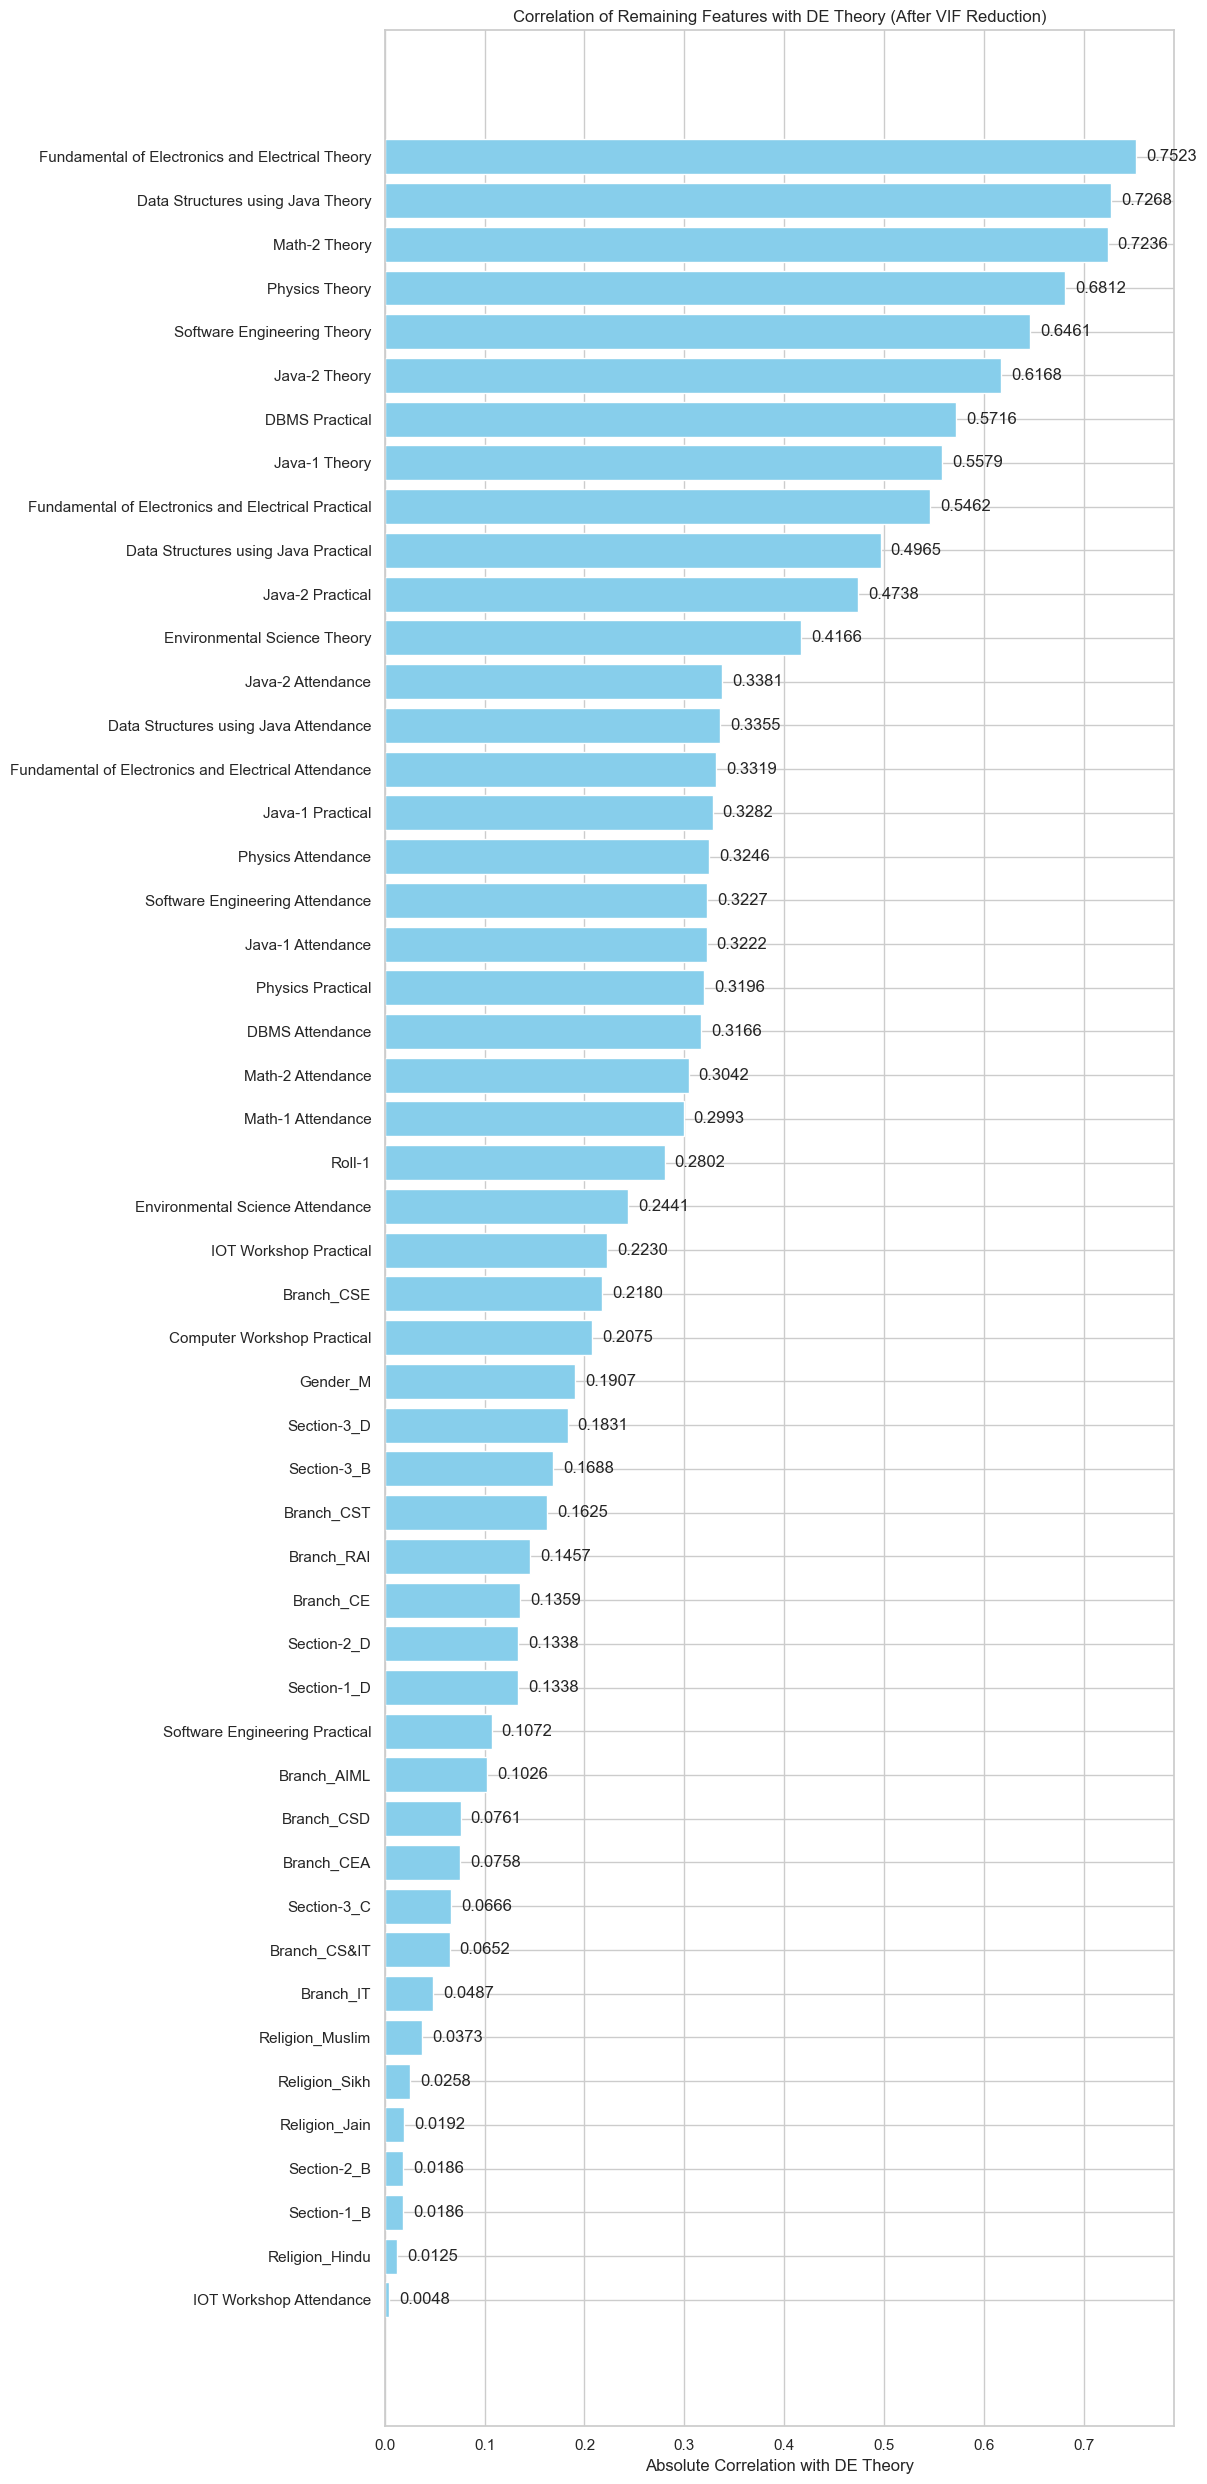


Final selected features (excluding target):
['Roll-1', 'Physics Theory', 'Physics Practical', 'Java-1 Theory', 'Java-1 Practical', 'Software Engineering Theory', 'Software Engineering Practical', 'Environmental Science Theory', 'IOT Workshop Practical', 'Computer Workshop Practical', 'Math-2 Theory', 'Data Structures using Java Theory', 'Data Structures using Java Practical', 'DBMS Practical', 'Fundamental of Electronics and Electrical Theory', 'Fundamental of Electronics and Electrical Practical', 'Java-2 Theory', 'Java-2 Practical', 'Math-1 Attendance', 'Physics Attendance', 'Java-1 Attendance', 'Software Engineering Attendance', 'Environmental Science Attendance', 'IOT Workshop Attendance', 'Math-2 Attendance', 'Data Structures using Java Attendance', 'DBMS Attendance', 'Fundamental of Electronics and Electrical Attendance', 'Java-2 Attendance', 'Gender_M', 'Religion_Hindu', 'Religion_Jain', 'Religion_Muslim', 'Religion_Sikh', 'Branch_AIML', 'Branch_CE', 'Branch_CEA', 'Branch_CS&IT

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Ensure plots display inline in Jupyter Notebook
# %matplotlib inline # This line is for Jupyter Notebook, will cause error if run as a script

# Read the DE train data
try:
    df = pd.read_csv("../train_dataset.csv")
except FileNotFoundError:
    print(
        "Error: 'train_dataset.csv' not found. Please ensure the file path is correct."
    )
    exit()

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "Math-3 Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Assuming values are strings like 'A4', 'C5', etc.
for section in ["Section-1", "Section-2", "Section-3"]:
    if section in df.columns:  # Check if column exists
        df[section] = (
            df[section].astype(str).str[0]
        )  # Ensure it's string type before .str accessor

# Print the first 5 rows
print("Head of de_train_data.csv:")
print(df.head())

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

# Create a DataFrame for VIF calculations (including one-hot encoded categoricals)
df_encoded = df.copy()
for col in categorical_cols:
    if col in ["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"]:
        try:
            encoded = pd.get_dummies(
                df[col], prefix=col, drop_first=True
            )  # drop_first to avoid perfect multicollinearity
            df_encoded = pd.concat([df_encoded, encoded], axis=1)
            df_encoded = df_encoded.drop(columns=[col])
        except Exception as e:
            print(f"Could not encode column {col}: {e}")

# Ensure all columns are numeric for VIF calculation and handle potential NaNs
df_for_vif = df_encoded.drop(columns=["DE Theory"], errors="ignore").copy()
df_for_vif = df_for_vif.select_dtypes(
    include=[np.number]
)  # Select only numeric columns
df_for_vif = df_for_vif.fillna(
    df_for_vif.mean()
)  # Fill NaNs with mean, or choose another strategy

# Add constant for VIF calculation if not already present (VIF expects an intercept)
# However, VIF is typically calculated on the independent variables.
# If 'DE Theory' is your target, you calculate VIF on the features.
X_vif = df_for_vif.copy()

# Check if 'DE Theory' is in the original df_encoded to calculate correlations later
target_variable = "DE Theory"
if target_variable not in df_encoded.columns:
    print(
        f"Warning: Target variable '{target_variable}' not found in df_encoded. Correlations with target cannot be computed."
    )
    correlations_with_de = {}
else:
    # 1. Create dictionary of absolute correlations with DE Theory
    correlations_with_de = {}
    for col in df_encoded.columns:
        if col != target_variable and pd.api.types.is_numeric_dtype(
            df_encoded[col]
        ):  # Ensure column is numeric
            try:
                corr = abs(df_encoded[col].corr(df_encoded[target_variable]))
                correlations_with_de[col] = corr
            except Exception as e:
                print(
                    f"Could not calculate correlation for {col} with {target_variable}: {e}"
                )
        elif col != target_variable:
            print(
                f"Skipping non-numeric column {col} for correlation with {target_variable}."
            )

# Print the correlation dictionary (sorted by absolute value)
print("\nAbsolute correlations with DE Theory:")
if correlations_with_de:
    for col, corr in sorted(
        correlations_with_de.items(), key=lambda x: x[1], reverse=True
    ):
        print(f"{col}: {corr:.4f}")
else:
    print("No correlations to display.")

# --- VIF Calculation ---
print("\nCalculating VIF...")
# Add constant term for VIF calculation (intercept) if your model will have one.
# VIF is calculated on the independent variables.
X_vif_const = add_constant(
    X_vif, has_constant="add"
)  # Adds a constant column for intercept

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_vif_const.values, i)
    for i in range(X_vif_const.shape[1])
]
vif_data = vif_data[vif_data["feature"] != "const"]  # Remove const VIF
print("\nInitial VIF values:")
print(vif_data.sort_values(by="VIF", ascending=False))

# Iteratively remove features with VIF > threshold (e.g., 5 or 10)
threshold_vif = 10
columns_to_drop_vif = []
features_for_vif_iter = X_vif.copy()  # Start with all features (excluding target)

while True:
    if (
        features_for_vif_iter.empty or features_for_vif_iter.shape[1] < 2
    ):  # Need at least 2 features for VIF
        print(
            "\nNot enough features to calculate VIF or all high VIF features removed."
        )
        break

    # Add constant for VIF calculation in each iteration
    temp_X_vif_const = add_constant(features_for_vif_iter, has_constant="add")

    vif_iter = pd.DataFrame()
    vif_iter["feature"] = temp_X_vif_const.columns
    try:
        vif_iter["VIF"] = [
            variance_inflation_factor(temp_X_vif_const.values, i)
            for i in range(temp_X_vif_const.shape[1])
        ]
    except Exception as e:  # Catch potential errors like singular matrix
        print(f"Error calculating VIF: {e}. Stopping VIF reduction.")
        break

    vif_iter = vif_iter[vif_iter["feature"] != "const"]  # Remove const
    max_vif_row = vif_iter.sort_values(by="VIF", ascending=False).iloc[0]

    if max_vif_row["VIF"] > threshold_vif:
        feature_to_drop = max_vif_row["feature"]
        print(f"Dropping '{feature_to_drop}' with VIF: {max_vif_row['VIF']:.2f}")

        # We need to decide how to drop: based purely on VIF or considering correlation with target
        # Original logic tried to keep feature more correlated with target.
        # For VIF, typically the highest VIF feature is dropped.
        # Let's stick to dropping the highest VIF feature first.
        # If you want to incorporate correlation with target, the logic would be more complex:
        # e.g., among features with VIF > threshold, drop the one with lowest corr with target.

        columns_to_drop_vif.append(feature_to_drop)
        features_for_vif_iter = features_for_vif_iter.drop(columns=[feature_to_drop])
    else:
        print("\nAll remaining features have VIF below threshold.")
        break

print("\nColumns to drop based on VIF >", threshold_vif, ":")
print(
    columns_to_drop_vif if columns_to_drop_vif else "No columns to drop based on VIF."
)

# Create reduced DataFrame after VIF
df_reduced_vif = df_encoded.drop(columns=columns_to_drop_vif, errors="ignore")
print(f"\nShape of df_encoded: {df_encoded.shape}")
print(f"Shape of df_reduced_vif: {df_reduced_vif.shape}")
print("\nRemaining columns after VIF reduction:")
print(df_reduced_vif.columns.tolist())

# 3. Plot correlations as a bar plot (using original correlations, for features remaining after VIF)
# Update correlations_with_de to only include remaining features
correlations_remaining = {
    col: corr
    for col, corr in correlations_with_de.items()
    if col in df_reduced_vif.columns and col != target_variable
}

if correlations_remaining:
    plt.figure(
        figsize=(12, max(8, len(correlations_remaining) * 0.5))
    )  # Adjust height based on number of features
    sorted_correlations_remaining = dict(
        sorted(correlations_remaining.items(), key=lambda item: item[1])
    )

    bars = plt.barh(
        list(sorted_correlations_remaining.keys()),
        list(sorted_correlations_remaining.values()),
        color="skyblue",
    )
    plt.xlabel(f"Absolute Correlation with {target_variable}")
    plt.title(
        f"Correlation of Remaining Features with {target_variable} (After VIF Reduction)"
    )
    plt.tight_layout()

    # Add correlation values on the bars
    for bar_obj in bars:  # Renamed 'bar' to 'bar_obj' to avoid conflict
        width = bar_obj.get_width()
        plt.text(
            x=width + 0.01,
            y=bar_obj.get_y() + bar_obj.get_height() / 2,
            s=f"{width:.4f}",
            ha="left",
            va="center",
        )
    plt.show()
else:
    print("\nNo correlations to plot after VIF reduction or target variable issues.")

print("\nFinal selected features (excluding target):")
final_features = [col for col in df_reduced_vif.columns if col != target_variable]
print(final_features)

# Linear Regression

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

# Read the DE train data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "Math-3 Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

# Define target and feature columns
target_col = "DE Theory"

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize linear regression model
model = LinearRegression()

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores across folds
neg_mae_scores = cross_val_score(model, X, y, cv=kf, scoring="neg_mean_absolute_error")

# Convert to positive MAE values
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results to terminal
print("Model: Multiple Linear Regression (MSE loss)")
print("Approach: multivariate regression + 5-Fold cv + one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV log
results_df = pd.DataFrame(
    [
        {
            "Model": "Multiple Linear Regression(MSE loss)",
            "Approach": "multivariate regression + 5-Fold cv + one-hot encoding",
            "MAE": round(mean_mae, 4),
        }
    ]
)

# Append to CSV or create if it doesn't exist
results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Multiple Linear Regression (MSE loss)
Approach: multivariate regression + 5-Fold cv + one-hot encoding
MAE: 7.5616


In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Read and preprocess the data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "Math-3 Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

# Define target and feature columns
target_col = "DE Theory"

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Add intercept manually
X = sm.add_constant(X)

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []

# Fit Quantile Regression (MAE = q=0.5) on each fold
for train_index, test_index in kf.split(X):
    # Ensure input is float type to prevent dtype=object errors
    X_train = X.iloc[train_index].astype(float)
    X_test = X.iloc[test_index].astype(float)
    y_train = y.iloc[train_index].astype(float)
    y_test = y.iloc[test_index].astype(float)

    # Fit Quantile Regression model (q=0.5 corresponds to MAE minimization)
    model = sm.QuantReg(y_train, X_train)
    result = model.fit(q=0.5)

    # Predict and calculate fold MAE
    preds = result.predict(X_test)
    fold_mae = np.mean(np.abs(y_test - preds))
    mae_scores.append(fold_mae)

mean_mae = np.mean(mae_scores)

# Print and log
print("Model: Quantile Regression (MAE loss)")
print("Approach: q=0.5 + 5-Fold cv + one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

results_df = pd.DataFrame(
    [
        {
            "Model": "Quantile Regression (MAE loss)",
            "Approach": "q=0.5 + 5-Fold CV + one-hot encoding",
            "MAE": round(mean_mae, 4),
        }
    ]
)

results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Quantile Regression (MAE loss)
Approach: q=0.5 + 5-Fold cv + one-hot encoding
MAE: 7.5496


In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

# Read and preprocess the data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "Math-3 Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

# drop columns with too high VIF
columns_to_drop = [
    "Math-1 Theory",
    "DBMS Theory",
    "Sem 2 Percentage",
    "Sem 1 Percentage",
]

# Drop columns, ignoring those not found
df_encoded = df_encoded.drop(columns=columns_to_drop, errors="ignore")

# Define target and feature columns
target_col = "DE Theory"

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize linear regression model
model = LinearRegression()

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores across folds
neg_mae_scores = cross_val_score(model, X, y, cv=kf, scoring="neg_mean_absolute_error")

# Convert to positive MAE values
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results to terminal
print("Model: Multiple Linear Regression (MSE loss + High VIF columns dropped)")
print("Approach: Multivariate regression + 5-Fold cv + one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV log
results_df = pd.DataFrame(
    [
        {
            "Model": "Multiple Linear Regression (MSE loss + High VIF columns dropped)",
            "Approach": "Multivariate regression + 5-Fold CV + one-hot encoding",
            "MAE": round(mean_mae, 4),
        }
    ]
)

# Append to CSV or create if it doesn't exist
results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Multiple Linear Regression (MSE loss + High VIF columns dropped)
Approach: Multivariate regression + 5-Fold cv + one-hot encoding
MAE: 7.6240


In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold

# Read and preprocess the data
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "Math-3 Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

# columns for Semester 1 core subjects
sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

# columns for Semester 2 core subjects
sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

# drop columns with too high VIF
columns_to_drop = [
    "Math-1 Theory",
    "DBMS Theory",
    "Sem 2 Percentage",
    "Sem 1 Percentage",
]

# Drop columns, ignoring those not found
df_encoded = df_encoded.drop(columns=columns_to_drop, errors="ignore")

# Define target and feature columns
target_col = "DE Theory"

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Add intercept manually
X = sm.add_constant(X)

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []

# Fit Quantile Regression (MAE = q=0.5) on each fold
for train_index, test_index in kf.split(X):
    # Ensure input is float type to prevent dtype=object errors
    X_train = X.iloc[train_index].astype(float)
    X_test = X.iloc[test_index].astype(float)
    y_train = y.iloc[train_index].astype(float)
    y_test = y.iloc[test_index].astype(float)

    # Fit Quantile Regression model (q=0.5 corresponds to MAE minimization)
    model = sm.QuantReg(y_train, X_train)
    result = model.fit(q=0.5)

    # Predict and calculate fold MAE
    preds = result.predict(X_test)
    fold_mae = np.mean(np.abs(y_test - preds))
    mae_scores.append(fold_mae)

mean_mae = np.mean(mae_scores)

# Print and log
print("Model: Quantile Regression (MAE loss + High VIF columns dropped)")
print("Approach: q=0.5 + 5-Fold cv + one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

results_df = pd.DataFrame(
    [
        {
            "Model": "Quantile Regression (MAE loss + High VIF columns dropped)",
            "Approach": "q=0.5 + 5-Fold CV + one-hot encoding",
            "MAE": round(mean_mae, 4),
        }
    ]
)

results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)

Model: Quantile Regression (MAE loss + High VIF columns dropped)
Approach: q=0.5 + 5-Fold cv + one-hot encoding
MAE: 7.7069


## Loss Function Comparison: MSE vs MAE

We ran a series of controlled experiments to compare models trained using **MSE loss** (Ordinary Least Squares) and **MAE loss** (Quantile Regression with q=0.5).  
All models were evaluated using **Mean Absolute Error (MAE)** under 5-Fold Cross-Validation.

Despite MAE loss being theoretically more robust to outliers, it consistently performed **worse** on our dataset.  
In contrast, models trained using **MSE loss achieved lower MAE**, indicating better predictive accuracy.

This suggests that the residuals in our data are approximately symmetric and not heavy-tailed—conditions under which MSE-trained models are statistically more efficient.

As a result, we have chosen to proceed with **MSE-based training**, as it generalizes better for our use case.


## Why We Are Not Dropping High-VIF Columns

We conducted controlled experiments to assess the impact of removing features with **high Variance Inflation Factor (VIF)** on model performance. While the principle of reducing multicollinearity by dropping these features might seem theoretically sound, our results showed a ** consistent drop in model accuracy** whenever these high-VIF columns were eliminated.

### Key Observations
- **Data/Information Loss**: Despite being correlated, these features still contain valuable information about the target. Removing them leads to the loss of that information, which can degrade the model’s predictive power.  
- **Practical Performance Over Theory**: Theoretically, highly correlated features can inflate variance estimates in regression coefficients. However, our empirical results suggest that the information these features provide outweighs the potential downsides.  
- **Model Accuracy**: Models trained with all features, including high-VIF ones, consistently outperformed the versions where high-VIF columns were removed. This was observed across multiple runs and cross-validation folds.

Hence, **we are retaining the high-VIF columns**: their removal causes worse performance due to the critical information they hold about our target variable, making them valuable features in our predictive models.

## Checking Residual Normality in Multiple Linear Regression

We will:
- Use the same data preprocessing and model setup we used above in multiple linear regression.  
- Manually perform the cross-validation splits to collect residuals (since `cross_val_score` alone doesn’t provide them).  
- Inspect residual distribution via histogram, Q-Q plot, and a normality test.

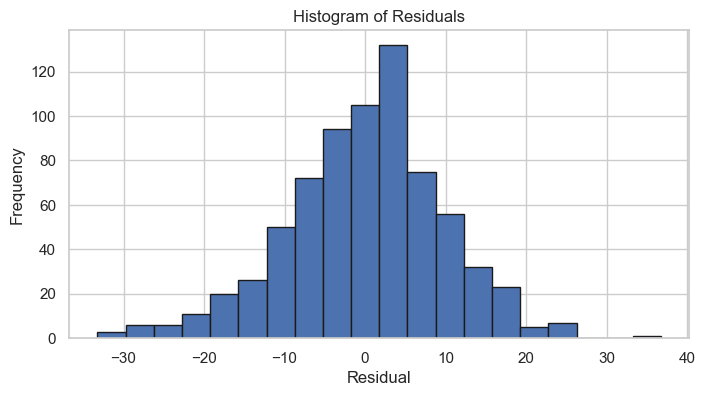

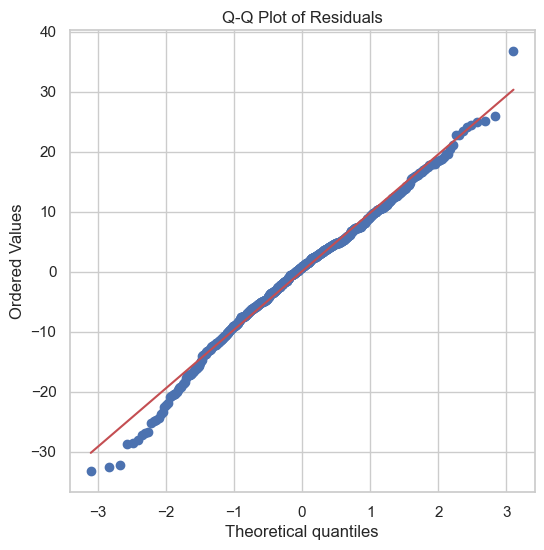

Shapiro-Wilk Test: statistic=0.990, p-value=0.000
Residuals do not appear normally distributed (reject H0).


In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import scipy.stats as stats

# --- Data Preprocessing ---
df = pd.read_csv("../train_dataset.csv")

# Drop the irrelevant, data-leak columns
df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "Math-3 Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]
df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1).round(2)

sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]
df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1).round(2)

df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

# Keep only the first character in each Section column
for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

# One-hot encode
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

target_col = "DE Theory"
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# --- Model ---
model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# --- Collect Residuals ---
all_residuals = []
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Residuals = actual - predicted
    residuals = y_test - y_pred
    all_residuals.extend(residuals)

all_residuals = np.array(all_residuals)

# --- Basic Residual Diagnostics ---
# 1. Histogram
plt.figure(figsize=(8, 4))
plt.hist(all_residuals, bins=20, edgecolor="k")
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# 2. Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(all_residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# 3. Normality Test (Shapiro-Wilk)
shapiro_stat, shapiro_p = stats.shapiro(all_residuals)
print(f"Shapiro-Wilk Test: statistic={shapiro_stat:.3f}, p-value={shapiro_p:.3f}")

# Interpretation of Shapiro-Wilk
if shapiro_p > 0.05:
    print("Residuals appear to come from a normal distribution (fail to reject H0).")
else:
    print("Residuals do not appear normally distributed (reject H0).")

# Polynomial Regression

In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

df = pd.read_csv("../train_dataset.csv")

df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "Math-3 Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

target_col = "DE Theory"

feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

polyreg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

kf = KFold(n_splits=5, shuffle=True, random_state=42)

neg_mae_scores = cross_val_score(
    polyreg, X, y, cv=kf, scoring="neg_mean_absolute_error"
)

mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

print("Model: Polynomial Regression (Order 2)")
print(
    "Approach: Full-feature polynomial regression (degree 2) with 5-Fold CV and one-hot encoding"
)
print(f"MAE: {mean_mae:.4f}")

results_df = pd.DataFrame(
    [
        {
            "Model": "Polynomial Regression (Order 2)",
            "Approach": "5-Fold CV + one-hot encoding + degree 2",
            "MAE": round(mean_mae, 4),
        }
    ]
)
results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)


Model: Polynomial Regression (Order 2)
Approach: Full-feature polynomial regression (degree 2) with 5-Fold CV and one-hot encoding
MAE: 28.8104


In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

df = pd.read_csv("../train_dataset.csv")

df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "Math-3 Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

columns_to_drop = [
    "Math-1 Theory",
    "DBMS Theory",
    "Sem 2 Percentage",
    "Sem 1 Percentage",
]

df_encoded = df_encoded.drop(columns=columns_to_drop, errors="ignore")

target_col = "DE Theory"

feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

polyreg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

kf = KFold(n_splits=5, shuffle=True, random_state=42)

neg_mae_scores = cross_val_score(
    polyreg, X, y, cv=kf, scoring="neg_mean_absolute_error"
)

mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

print("Model: Polynomial Regression (Order 2)")
print("Approach: 5-Fold CV + one-hot encoding + high VIF columns dropped")
print(f"MAE: {mean_mae:.4f}")

results_df = pd.DataFrame(
    [
        {
            "Model": "Polynomial Regression (Order 2)",
            "Approach": "5-Fold CV + one-hot encoding + degree 2 + high VIF columns dropped",
            "MAE": round(mean_mae, 4),
        }
    ]
)
results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)


Model: Polynomial Regression (Order 2)
Approach: 5-Fold CV + one-hot encoding + high VIF columns dropped
MAE: 33.3695


In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

df = pd.read_csv("../train_dataset.csv")

df = df.drop(
    columns=[
        "Student ID",
        "Mentor-1",
        "Mentor-2",
        "Mentor-3",
        "Roll-2",
        "Roll-3",
        "Math-3 Theory",
        "DE Practical",
        "FSD Theory",
        "FSD Practical",
        "Python Theory",
        "Python Practical",
        "Communication Theory",
        "Law Theory",
    ]
)

sem1_columns = [
    "Math-1 Theory",
    "Physics Theory",
    "Java-1 Theory",
    "Software Engineering Theory",
]

df["Sem 1 Percentage"] = df[sem1_columns].mean(axis=1)

sem2_columns = [
    "Math-2 Theory",
    "Data Structures using Java Theory",
    "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory",
    "Java-2 Theory",
]

df["Sem 2 Percentage"] = df[sem2_columns].mean(axis=1)

df["Sem 1 Percentage"] = df["Sem 1 Percentage"].round(2)
df["Sem 2 Percentage"] = df["Sem 2 Percentage"].round(2)

df = df.rename(
    columns={"Div-1": "Section-1", "Div-2": "Section-2", "Div-3": "Section-3"}
)

for section in ["Section-1", "Section-2", "Section-3"]:
    df[section] = df[section].str[0]

df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Religion", "Branch", "Section-1", "Section-2", "Section-3"],
    drop_first=True,
)

target_col = "DE Theory"

feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

polyreg = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

kf = KFold(n_splits=5, shuffle=True, random_state=42)

neg_mae_scores = cross_val_score(
    polyreg, X, y, cv=kf, scoring="neg_mean_absolute_error"
)

mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

print("Model: Polynomial Regression (Order 3)")
print("Approach: Full-feature polynomial regression + 5-Fold CV + one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

results_df = pd.DataFrame(
    [
        {
            "Model": "Polynomial Regression (Order 3)",
            "Approach": "5-Fold CV + one-hot encoding + degree 3",
            "MAE": round(mean_mae, 4),
        }
    ]
)
results_df.to_csv(
    "model_results_log.csv",
    mode="a",
    header=not pd.io.common.file_exists("model_results_log.csv"),
    index=False,
)


Model: Polynomial Regression (Order 3)
Approach: Full-feature polynomial regression + 5-Fold CV + one-hot encoding
MAE: 18.0693


In [28]:
# order 3 drop high VIF here 

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the train data
df = pd.read_csv('../train_dataset.csv')

# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                      'Math-3 Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
# Scores are numerical and out of 100
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
# Scores are numerical and out of 100
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get only Department
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(df, columns=["Gender", "Religion", "Branch", 'Section-1', 'Section-2', 'Section-3'], drop_first=True)

# Define target and feature columns
target_col = 'DE Theory'

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 4)
polyreg = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(polyreg, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 4)")
print("Approach: Full-feature polynomial regression (degree 4) with 5-Fold CV and one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame([{
    "Model": "Polynomial Regression (Order 4)",
    "Approach": "5-Fold CV + one-hot encoding + degree 4",
    "MAE": round(mean_mae, 4)
}])
results_df.to_csv("model_results_log.csv", mode='a', header=not pd.io.common.file_exists("model_results_log.csv"), index=False)

Model: Polynomial Regression (Order 4)
Approach: Full-feature polynomial regression (degree 4) with 5-Fold CV and one-hot encoding
MAE: 16.7219


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the train data
df = pd.read_csv('../train_dataset.csv')

# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                      'Math-3 Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
# Scores are numerical and out of 100
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
# Scores are numerical and out of 100
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get only Department
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(df, columns=["Gender", "Religion", "Branch", 'Section-1', 'Section-2', 'Section-3'], drop_first=True)

# Drop columns with high VIF
columns_to_drop = ['Math-1 Theory', 'DBMS Theory', 'Sem 2 Percentage', 'Sem 1 Percentage']

# Drop columns, ignoring those not found
df_encoded = df_encoded.drop(columns=columns_to_drop, errors='ignore')

# Define target and feature columns
target_col = 'DE Theory'

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 4)
polyreg = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(polyreg, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 4, High VIF columns dropped)")
print("Approach: Full-feature polynomial regression (degree 4) with 5-Fold CV, one-hot encoding, and high VIF columns dropped")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame([{
    "Model": "Polynomial Regression (Order 4, High VIF columns dropped)",
    "Approach": "5-Fold CV + one-hot encoding + degree 4 + high VIF columns dropped",
    "MAE": round(mean_mae, 4)
}])
results_df.to_csv("model_results_log.csv", mode='a', header=not pd.io.common.file_exists("model_results_log.csv"), index=False)

Model: Polynomial Regression (Order 4, High VIF columns dropped)
Approach: Full-feature polynomial regression (degree 4) with 5-Fold CV, one-hot encoding, and high VIF columns dropped
MAE: 17.5248


# Random forest regressor